# This is the code for 4-components misspecified models (Figures - 5c and Figures 5d) 

## Actual Data - Pinwheel (warped GMM) ; Model fitted - GMM

In [ ]:
#!pip install autograd
# In case, autograd is not installed.

In [1]:
import autograd.numpy as np
import autograd.numpy.random as npr
from data import make_pinwheel

global data 
npr.seed(1)

data = make_pinwheel(radial_std=0.3, tangential_std=0.05, num_classes=4,
                         num_per_class=100, rate=0.4,rs=npr.RandomState(1))

## Defining the KL-Divs and combinatorial KL-Divs

In [2]:
def kl_mvn(m0, S0, m1, S1):
    """
    Kullback-Liebler divergence from Gaussian pm,pv to Gaussian qm,qv.
    Also computes KL divergence from a single Gaussian pm,pv to a set
    of Gaussians qm,qv.
    Diagonal covariances are assumed.  Divergence is expressed in nats.

    - accepts stacks of means, but only one S0 and S1

    From wikipedia
    KL( (m0, S0) || (m1, S1))
         = .5 * ( tr(S1^{-1} S0) + log |S1|/|S0| + 
                  (m1 - m0)^T S1^{-1} (m1 - m0) - N )
    """
    # store inv diag covariance of S1 and diff between means
    N = m0.shape[0]
    iS1 = np.linalg.inv(S1)
    diff = m1 - m0

    # kl is made of three terms
    tr_term   = np.trace(iS1 @ S0)
    det_term  = np.log(np.linalg.det(S1)) - np.log(np.linalg.det(S0)) #np.sum(np.log(S1)) - np.sum(np.log(S0))
    quad_term = diff.T @ np.linalg.inv(S1) @ diff #np.sum( (diff*diff) * iS1, axis=1)
    #print("det term {}",format(det_term))
    return .5 * (tr_term + det_term + quad_term - N) 

def kl_inverse_mvn(m1, S1, m0, S0):
   
    # store inv diag covariance of S1 and diff between means
    N = m0.shape[0]
    iS1 = np.linalg.inv(S1)
    diff = m1 - m0

    # kl is made of three terms
    tr_term   = np.trace(iS1 @ S0)
    det_term  = np.log(np.linalg.det(S1)) - np.log(np.linalg.det(S0)) #np.sum(np.log(S1)) - np.sum(np.log(S0))
    quad_term = diff.T @ np.linalg.inv(S1) @ diff #np.sum( (diff*diff) * iS1, axis=1)
    #print(tr_term,det_term,quad_term)
    return .5 * (tr_term + det_term + quad_term - N) 


def kl_div_tot(means,covariances):
    kl_divs = []
    for i in range(0,means.shape[0]):
        #print(i)
        for j in range(i,means.shape[0]):
            #print(i,j)
            kl_divs.append(kl_mvn(means[i],covariances[i],means[j],covariances[j]) )
    #print(kl_divs)        
    return (np.sum(kl_divs))

def kl_div_inverse_tot(means,covariances):
    kl_divs = []
    for i in range(0,means.shape[0]):
        #print(i)
        for j in range(i,means.shape[0]):
            #print(i,j)
            kl_divs.append(kl_inverse_mvn(means[i],covariances[i],means[j],covariances[j]) )
    #print(kl_divs)        
    return (np.sum(kl_divs))

# The below two functions are for printing the output of combinatorial KL-Divs

def kl_div_tot_print(means,covariances):
    kl_divs = []
    for i in range(0,means.shape[0]):
        #print(i)
        for j in range(i,means.shape[0]):
            #print(i,j)
            kl_divs.append(kl_mvn(means[i],covariances[i],means[j],covariances[j]) )
    print(kl_divs) 
    print(np.sum(kl_divs))
    #return (np.sum(kl_divs))

def kl_div_inverse_tot_print(means,covariances):
    kl_divs = []
    for i in range(0,means.shape[0]):
        #print(i)
        for j in range(i,means.shape[0]):
            #print(i,j)
            kl_divs.append(kl_inverse_mvn(means[i],covariances[i],means[j],covariances[j]) )
    print(kl_divs) 
    print(np.sum(kl_divs))
    #return (np.sum(kl_divs))


# This is the first step of SIA

Log likelihood -902.0897650464581
Log likelihood -902.0897650464582
log proportions [0.2953504  0.23740844 0.24177757 0.22546359]
mean_params [[ 0.02586992 -0.13510141]
 [ 0.1048601  -0.03003009]
 [-0.00592617  0.01245826]
 [ 0.08691977 -0.13825952]]
{'log proportions': array([ 0.15741834, -0.06096209, -0.04272597, -0.11258542]), 'means': array([[ 0.02586992, -0.13510141],
       [ 0.1048601 , -0.03003009],
       [-0.00592617,  0.01245826],
       [ 0.08691977, -0.13825952]]), 'lower triangles': array([[[ 0.71804526, -0.01218968],
        [-0.01218968,  0.77030899]],

       [[ 0.7789828 , -0.00908731],
        [-0.00908731,  0.80626429]],

       [[ 0.76403859, -0.00559789],
        [-0.00559789,  0.79925425]],

       [[ 0.78880596, -0.01015918],
        [-0.01015918,  0.82373909]]])}
[0.0, 0.022308690304852385, 0.02300370726532508, 0.015645184628437114, 0.0, 0.012309628522319205, 0.009580293076978164, 0.0, 0.02507209748066752, 0.0]
0.10791960127857947
kl-div None
[0.0, 0.0250889108

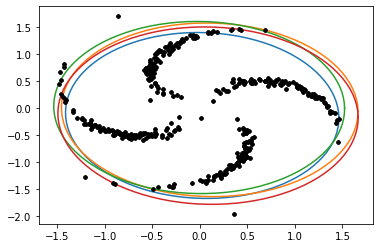

Log likelihood -898.1970526127245
Log likelihood -898.1970526127245
log proportions [0.29592015 0.23696243 0.24335889 0.22375853]
mean_params [[-0.032067   -0.07831838]
 [ 0.05438026  0.01289673]
 [-0.0470874   0.05335867]
 [ 0.03971859 -0.08990759]]
{'log proportions': array([ 0.15960188, -0.06258619, -0.03595053, -0.1199203 ]), 'means': array([[-0.032067  , -0.07831838],
       [ 0.05438026,  0.01289673],
       [-0.0470874 ,  0.05335867],
       [ 0.03971859, -0.08990759]]), 'lower triangles': array([[[ 0.68297425, -0.00403916],
        [-0.003026  ,  0.75997368]],

       [[ 0.70167862, -0.00423078],
        [-0.00385212,  0.74683953]],

       [[ 0.69192786, -0.0029949 ],
        [-0.00272723,  0.74730252]],

       [[ 0.70312278, -0.0039396 ],
        [-0.0033978 ,  0.75873781]]])}
[0.0, 0.016242598461390312, 0.016185547028180203, 0.006145101262154284, 0.0, 0.01235865725510732, 0.009677910370696097, 0.0, 0.02570091961667531, 0.0]
0.08631073399420353
kl-div None
[0.0, 0.0164075318

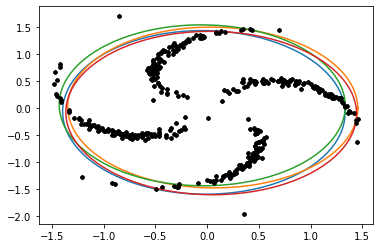

Log likelihood -897.5835869352833
Log likelihood -897.5835869352833
log proportions [0.2958127  0.23700129 0.24345401 0.22373201]
mean_params [[-0.03679572 -0.07442307]
 [ 0.05373315  0.01769429]
 [-0.05129011  0.05878032]
 [ 0.03810049 -0.08641815]]
{'log proportions': array([ 0.15922045, -0.06244048, -0.03557801, -0.12005711]), 'means': array([[-0.03679572, -0.07442307],
       [ 0.05373315,  0.01769429],
       [-0.05129011,  0.05878032],
       [ 0.03810049, -0.08641815]]), 'lower triangles': array([[[ 7.11925425e-01, -5.72141838e-03],
        [-4.95050999e-03,  7.72769845e-01]],

       [[ 7.22717552e-01, -2.63267997e-03],
        [-2.21239309e-03,  7.55840698e-01]],

       [[ 7.15671820e-01, -2.97521659e-03],
        [-2.74715696e-03,  7.59407825e-01]],

       [[ 7.17920602e-01, -1.29263586e-03],
        [-5.85192856e-04,  7.63695530e-01]]])}
[0.0, 0.016124956324652828, 0.01591852155063722, 0.005841892065030274, 0.0, 0.01228943840926866, 0.009695945436637432, 0.0, 0.02582165930

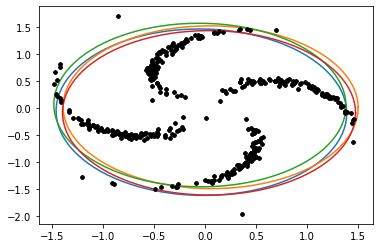

Log likelihood -897.5570569314098
Log likelihood -897.5570569314098
log proportions [0.29576298 0.23701078 0.24357825 0.22364799]
mean_params [[-0.04046558 -0.06875809]
 [ 0.05183886  0.02301752]
 [-0.05420555  0.06450696]
 [ 0.03592477 -0.08227251]]
{'log proportions': array([ 0.15905071, -0.06240206, -0.03506945, -0.12043434]), 'means': array([[-0.04046558, -0.06875809],
       [ 0.05183886,  0.02301752],
       [-0.05420555,  0.06450696],
       [ 0.03592477, -0.08227251]]), 'lower triangles': array([[[ 7.10670343e-01, -6.80107709e-03],
        [-6.10361046e-03,  7.74027027e-01]],

       [[ 7.25752984e-01, -1.79358577e-03],
        [-1.32904833e-03,  7.59982023e-01]],

       [[ 7.18806497e-01, -3.63163992e-03],
        [-3.42912321e-03,  7.65807508e-01]],

       [[ 7.17595667e-01,  6.31093670e-04],
        [ 1.46453895e-03,  7.65405914e-01]]])}
[0.0, 0.016305379648672957, 0.01556779394457286, 0.006252389210478437, 0.0, 0.01244003632520796, 0.009902771521477671, 0.0, 0.02642403386

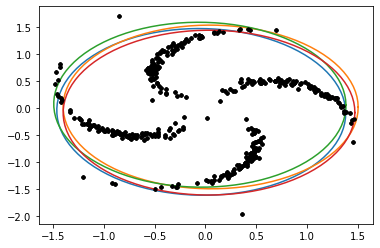

Log likelihood -897.5103559642491
Log likelihood -897.5103559642489
log proportions [0.29566581 0.23722171 0.24342029 0.2236922 ]
mean_params [[-0.11360136 -0.09211256]
 [ 0.1030954   0.05364639]
 [-0.07474718  0.08110175]
 [ 0.09804521 -0.11561799]]
{'log proportions': array([ 0.15869463, -0.06153998, -0.03574564, -0.12026415]), 'means': array([[-0.11360136, -0.09211256],
       [ 0.1030954 ,  0.05364639],
       [-0.07474718,  0.08110175],
       [ 0.09804521, -0.11561799]]), 'lower triangles': array([[[ 0.69204022, -0.01708851],
        [-0.0170553 ,  0.79583011]],

       [[ 0.7394283 ,  0.00392974],
        [ 0.00464505,  0.73261931]],

       [[ 0.69136048, -0.01016104],
        [-0.01031439,  0.78115088]],

       [[ 0.73295396,  0.01494405],
        [ 0.01683126,  0.73908341]]])}
[0.0, 0.07518849004301376, 0.027041579876061483, 0.0556503982315153, 0.0, 0.042928966532848056, 0.026870356376416993, -1.1102230246251565e-16, 0.07501286427536291, -1.1102230246251565e-16]
0.3026926553

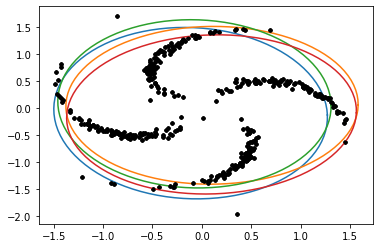

Log likelihood -896.865905917092
Log likelihood -896.865905917092
log proportions [0.29625409 0.23767877 0.2423429  0.22372424]
mean_params [[-0.32537279 -0.15482139]
 [ 0.21780288  0.19702474]
 [-0.15011349  0.11245396]
 [ 0.34002991 -0.2339413 ]]
{'log proportions': array([ 0.16077736, -0.05952011, -0.04008646, -0.12002593]), 'means': array([[-0.32537279, -0.15482139],
       [ 0.21780288,  0.19702474],
       [-0.15011349,  0.11245396],
       [ 0.34002991, -0.2339413 ]]), 'lower triangles': array([[[ 0.66820848, -0.02941629],
        [-0.03131766,  0.76440575]],

       [[ 0.67379452, -0.03464548],
        [-0.03485998,  0.77107169]],

       [[ 0.77863339,  0.02463138],
        [ 0.02669911,  0.68001075]],

       [[ 0.6527384 ,  0.02394934],
        [ 0.02357655,  0.76762509]]])}
[0.0, 0.4679074389950877, 0.14454899240257535, 0.5461663879122818, 0.0, 0.16578763931339213, 0.19783057758422373, 0.0, 0.45670129344278987, 0.0]
1.9789423296503506
kl-div None
[0.0, 0.47087708740326417, 

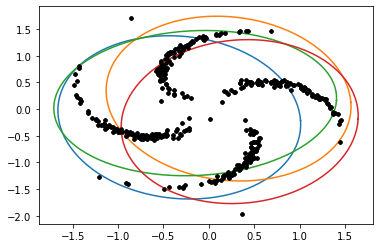

Log likelihood -895.7562640293352
Log likelihood -895.756264029335
log proportions [0.29640658 0.23780396 0.24206354 0.22372592]
mean_params [[-0.32343278 -0.15434209]
 [ 0.21421112  0.20200477]
 [-0.14841398  0.11783775]
 [ 0.33901703 -0.23555044]]
{'log proportions': array([ 0.16131812, -0.05896732, -0.04121372, -0.11999222]), 'means': array([[-0.32343278, -0.15434209],
       [ 0.21421112,  0.20200477],
       [-0.14841398,  0.11783775],
       [ 0.33901703, -0.23555044]]), 'lower triangles': array([[[ 0.64361055, -0.03323804],
        [-0.03460696,  0.76281078]],

       [[ 0.66589641, -0.03893056],
        [-0.03965263,  0.76528473]],

       [[ 0.76394957,  0.02356447],
        [ 0.02490269,  0.69142703]],

       [[ 0.63186646,  0.03408503],
        [ 0.03504039,  0.75950091]]])}
[0.0, 0.4812065991973298, 0.14732507954024743, 0.5909510207232129, 0.0, 0.16018507431945483, 0.22499500331015687, 0.0, 0.49526505239183805, 0.0]
2.09992782948224
kl-div None
[0.0, 0.5005897051761945, 0.

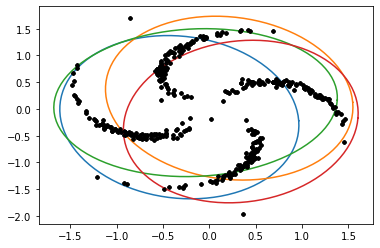

Log likelihood -893.7927960988268
Log likelihood -893.7927960988268
log proportions [0.29690894 0.23782327 0.24144969 0.2238181 ]
mean_params [[-0.33718768 -0.15623424]
 [ 0.21150643  0.22037337]
 [-0.14779893  0.13222572]
 [ 0.35703176 -0.24772375]]
{'log proportions': array([ 0.16309966, -0.05879799, -0.04366468, -0.11949214]), 'means': array([[-0.33718768, -0.15623424],
       [ 0.21150643,  0.22037337],
       [-0.14779893,  0.13222572],
       [ 0.35703176, -0.24772375]]), 'lower triangles': array([[[ 0.59911805, -0.0424785 ],
        [-0.04329944,  0.76023549]],

       [[ 0.66037159, -0.04746808],
        [-0.05016014,  0.74775742]],

       [[ 0.73474272,  0.02087012],
        [ 0.02075697,  0.71590634]],

       [[ 0.58653193,  0.06391167],
        [ 0.06973038,  0.73442796]]])}
[0.0, 0.5469237345176312, 0.16429548724034793, 0.8219604917142442, 0.0, 0.15499906473788072, 0.361352420007361, 0.0, 0.6893455469013241, -1.1102230246251565e-16]
2.738876745118789
kl-div None
[0.0, 0.6

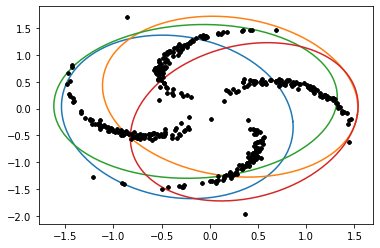

Log likelihood -861.6900133814565
Log likelihood -861.6900133814565
log proportions [0.29972349 0.23464905 0.23972393 0.22590354]
mean_params [[-0.63326643 -0.20236933]
 [ 0.26089103  0.37322323]
 [-0.20938887  0.19952234]
 [ 0.78528375 -0.4712789 ]]
{'log proportions': array([ 0.17300971, -0.07175963, -0.05036266, -0.10974255]), 'means': array([[-0.63326643, -0.20236933],
       [ 0.26089103,  0.37322323],
       [-0.20938887,  0.19952234],
       [ 0.78528375, -0.4712789 ]]), 'lower triangles': array([[[ 0.63176669, -0.0547171 ],
        [-0.06207728,  0.74770542]],

       [[ 0.76535566, -0.05086588],
        [-0.06851071,  0.6569289 ]],

       [[ 0.706103  ,  0.018946  ],
        [ 0.01672408,  0.76339896]],

       [[ 0.43577026,  0.22056782],
        [ 0.2643965 ,  0.58362741]]])}
[0.0, 1.3136730141220232, 0.33782759858357503, 15.522479849856495, 0.0, 0.29064635247655746, 9.762193925222405, 0.0, 13.20004136499303, 0.0]
40.42686210525409
kl-div None
[0.0, 1.573232711209926, 0.482

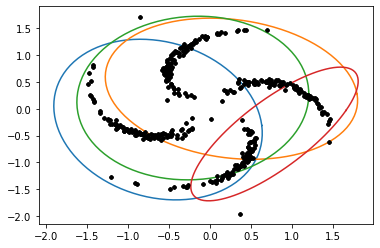

Log likelihood -812.3957202595482
Log likelihood -812.395720259548
log proportions [0.29750715 0.23531349 0.23998002 0.22719934]
mean_params [[-0.61555244 -0.19716506]
 [ 0.25626521  0.39434249]
 [-0.20547644  0.21139781]
 [ 0.70704019 -0.45218365]]
{'log proportions': array([ 0.1650394 , -0.06948025, -0.04984319, -0.1045711 ]), 'means': array([[-0.61555244, -0.19716506],
       [ 0.25626521,  0.39434249],
       [-0.20547644,  0.21139781],
       [ 0.70704019, -0.45218365]]), 'lower triangles': array([[[ 0.58363645, -0.0476367 ],
        [-0.05094687,  0.72486017]],

       [[ 0.72978187, -0.05623514],
        [-0.07183913,  0.62827734]],

       [[ 0.67709193,  0.0274006 ],
        [ 0.02546021,  0.75286591]],

       [[ 0.30303803,  0.30749081],
        [ 0.32612501,  0.53256491]]])}
[0.0, 1.470685452139238, 0.3511528081403319, 147.49221124485592, 0.0, 0.3181339453998855, 97.52060870697028, 0.0, 129.62201839644436, -6.661338147750939e-16]
376.77481055395003
kl-div None
[0.0, 1.74045

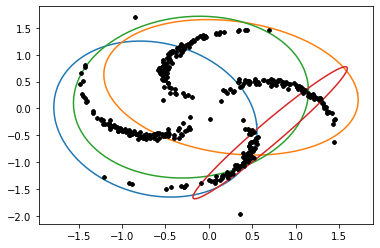

Log likelihood -804.9950247698114
Log likelihood -804.9950247698114
log proportions [0.29725943 0.23553543 0.23996848 0.22723666]
mean_params [[-0.6155245  -0.19669767]
 [ 0.2576345   0.39668033]
 [-0.20501356  0.2128574 ]
 [ 0.7264305  -0.47192273]]
{'log proportions': array([ 0.16414992, -0.06859399, -0.04994774, -0.10446333]), 'means': array([[-0.6155245 , -0.19669767],
       [ 0.2576345 ,  0.39668033],
       [-0.20501356,  0.2128574 ],
       [ 0.7264305 , -0.47192273]]), 'lower triangles': array([[[ 0.57901064, -0.04636953],
        [-0.0490988 ,  0.72327345]],

       [[ 0.72762615, -0.05770601],
        [-0.07323168,  0.62388491]],

       [[ 0.67584561,  0.02835446],
        [ 0.02652896,  0.75150671]],

       [[ 0.28351177,  0.3172964 ],
        [ 0.30884042,  0.54587261]]])}
[0.0, 1.5018480856683483, 0.353666980909515, 180.30831746441976, 0.0, 0.32305598739614605, 114.58803969854435, 0.0, 155.01844402620853, -4.440892098500626e-16]
452.09337224314663
kl-div None
[0.0, 1.76

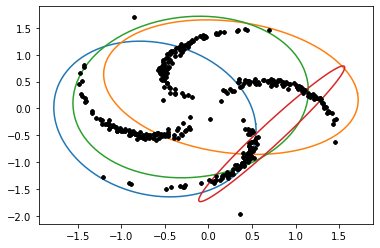

Log likelihood -797.9188398508863
Log likelihood -797.9188398508863
log proportions [0.29703347 0.23580123 0.23996672 0.22719858]
mean_params [[-0.61563059 -0.19628015]
 [ 0.25934623  0.39886316]
 [-0.20444142  0.21421596]
 [ 0.72086939 -0.47378299]]
{'log proportions': array([ 0.16334136, -0.06751425, -0.05000321, -0.10467904]), 'means': array([[-0.61563059, -0.19628015],
       [ 0.25934623,  0.39886316],
       [-0.20444142,  0.21421596],
       [ 0.72086939, -0.47378299]]), 'lower triangles': array([[[ 0.57460225, -0.04507882],
        [-0.04722837,  0.72182882]],

       [[ 0.72569223, -0.05928049],
        [-0.07474776,  0.61933656]],

       [[ 0.67492394,  0.02923641],
        [ 0.02753173,  0.75011788]],

       [[ 0.26662117,  0.32776909],
        [ 0.32262517,  0.53513223]]])}
[0.0, 1.5351939411093443, 0.3562808474739685, 423.1279152676901, -1.1102230246251565e-16, 0.3281901652789032, 271.6703558652229, 0.0, 366.1210296177446, 2.220446049250313e-16]
1063.13896570452
kl-div N

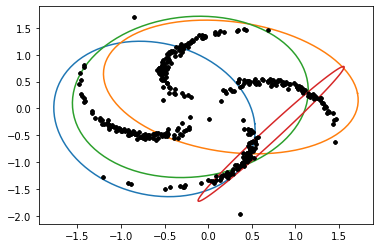

Log likelihood -789.050540571593
Log likelihood -789.050540571593
log proportions [0.29474914 0.23897937 0.24001643 0.22625505]
mean_params [[-0.61657573 -0.19247652]
 [ 0.28004782  0.42227169]
 [-0.19729678  0.22814072]
 [ 0.71063822 -0.52942006]]
{'log proportions': array([ 0.15519281, -0.05455459, -0.05022443, -0.10926893]), 'means': array([[-0.61657573, -0.19247652],
       [ 0.28004782,  0.42227169],
       [-0.19729678,  0.22814072],
       [ 0.71063822, -0.52942006]]), 'lower triangles': array([[[ 0.52801807, -0.03187212],
        [-0.02800303,  0.70661765]],

       [[ 0.70517311, -0.07702245],
        [-0.09187471,  0.56916111]],

       [[ 0.66641449,  0.03804243],
        [ 0.03760226,  0.73556285]],

       [[ 0.27231371,  0.31497201],
        [ 0.33645709,  0.50872252]]])}
[0.0, 1.9885519788185966, 0.3899981981134435, 512.7680344159464, 0.0, 0.3936056605779399, 347.584511571897, -1.1102230246251565e-16, 463.27174267085184, -2.3314683517128287e-15]
1326.3964444962053
kl-div

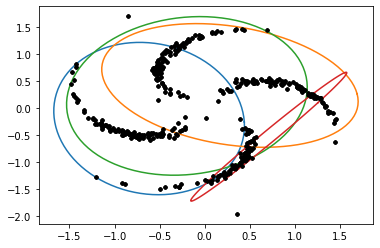

Log likelihood -781.8464329900307
Log likelihood -781.8464329900303
log proportions [0.29408845 0.23999517 0.23983672 0.22607967]
mean_params [[-0.61985825 -0.19158907]
 [ 0.28834053  0.43232724]
 [-0.19598527  0.23257574]
 [ 0.67327206 -0.52378723]]
{'log proportions': array([ 0.15283048, -0.05043129, -0.05109173, -0.11016261]), 'means': array([[-0.61985825, -0.19158907],
       [ 0.28834053,  0.43232724],
       [-0.19598527,  0.23257574],
       [ 0.67327206, -0.52378723]]), 'lower triangles': array([[[ 0.51262965, -0.02808147],
        [-0.02240901,  0.70173205]],

       [[ 0.69747278, -0.08537287],
        [-0.09951073,  0.55176381]],

       [[ 0.66406749,  0.04024949],
        [ 0.04011072,  0.73197674]],

       [[ 0.2570796 ,  0.31965235],
        [ 0.31018216,  0.5223514 ]]])}
[0.0, 2.2242655926833423, 0.4054725798709844, 421.2757462551721, 0.0, 0.4251309577701812, 270.55992819380674, 0.0, 370.27349612987024, -2.220446049250313e-15]
1065.1640397091737
kl-div None
[0.0, 2.301

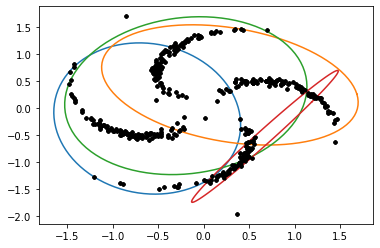

Log likelihood -775.4251495365583
Log likelihood -775.425149536558
log proportions [0.29270777 0.24242459 0.23924608 0.22562157]
mean_params [[-0.62926943 -0.19057045]
 [ 0.31026538  0.45744801]
 [-0.19375046  0.24226229]
 [ 0.67868649 -0.57389392]]
{'log proportions': array([ 0.14790666, -0.04057739, -0.05377544, -0.11240897]), 'means': array([[-0.62926943, -0.19057045],
       [ 0.31026538,  0.45744801],
       [-0.19375046,  0.24226229],
       [ 0.67868649, -0.57389392]]), 'lower triangles': array([[[ 0.47717064, -0.02072807],
        [-0.01137026,  0.69119895]],

       [[ 0.68063241, -0.10770123],
        [-0.12000459,  0.50902253]],

       [[ 0.6593759 ,  0.04464581],
        [ 0.04507191,  0.72540158]],

       [[ 0.26923722,  0.30260786],
        [ 0.33008463,  0.49104127]]])}
[0.0, 3.005361872465839, 0.4481955833596323, 480.7096090511334, 0.0, 0.5203985768841854, 330.15935851681684, 0.0, 442.3314992811642, 3.1086244689504383e-15]
1257.174422881824
kl-div None
[0.0, 2.7841571

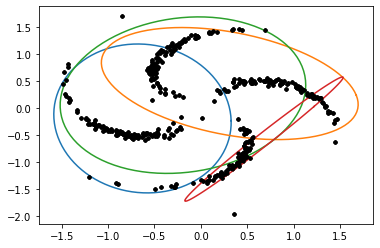

Log likelihood -767.4322113902851
Log likelihood -767.4322113902849
log proportions [0.29238456 0.24301456 0.23901698 0.2255839 ]
mean_params [[-0.63284384 -0.19033703]
 [ 0.31616958  0.46496166]
 [-0.19359916  0.24449573]
 [ 0.65508133 -0.56831654]]
{'log proportions': array([ 0.14675162, -0.03819695, -0.05478368, -0.11262613]), 'means': array([[-0.63284384, -0.19033703],
       [ 0.31616958,  0.46496166],
       [-0.19359916,  0.24449573],
       [ 0.65508133, -0.56831654]]), 'lower triangles': array([[[ 0.46898155, -0.01906753],
        [-0.00889572,  0.68830002]],

       [[ 0.67535966, -0.11452844],
        [-0.12596366,  0.49775142]],

       [[ 0.65822004,  0.04538722],
        [ 0.04587467,  0.724425  ]],

       [[ 0.25530334,  0.30806343],
        [ 0.30979158,  0.50202863]]])}
[0.0, 3.290210467113554, 0.4601939649501492, 456.94167695145336, 0.0, 0.5510554892441282, 298.75712932156466, 0.0, 409.6679692975476, 3.1086244689504383e-15]
1169.6682354918735
kl-div None
[0.0, 2.9281

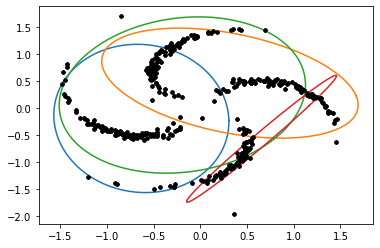

Log likelihood -756.8864733714646
Log likelihood -756.8864733714641
log proportions [0.29099896 0.24590926 0.23791098 0.22518081]
mean_params [[-0.6493557  -0.1901777 ]
 [ 0.34564699  0.50037169]
 [-0.19291018  0.25405165]
 [ 0.62631434 -0.60074691]]
{'log proportions': array([ 0.14183526, -0.02652182, -0.05958786, -0.11458072]), 'means': array([[-0.6493557 , -0.1901777 ],
       [ 0.34564699,  0.50037169],
       [-0.19291018,  0.25405165],
       [ 0.62631434, -0.60074691]]), 'lower triangles': array([[[ 4.32305443e-01, -1.26993885e-02],
        [ 6.26441135e-04,  6.75517351e-01]],

       [[ 6.51894390e-01, -1.48037783e-01],
        [-1.55511778e-01,  4.43336523e-01]],

       [[ 6.53360048e-01,  4.81068612e-02],
        [ 4.87390303e-02,  7.21381101e-01]],

       [[ 2.64720768e-01,  2.88083550e-01],
        [ 3.07978535e-01,  4.80441669e-01]]])}
[0.0, 5.281255284785556, 0.5214972590389393, 304.4432296696955, 0.0, 0.7278082827880845, 204.77778903148493, 0.0, 279.1717465543047, 4.44

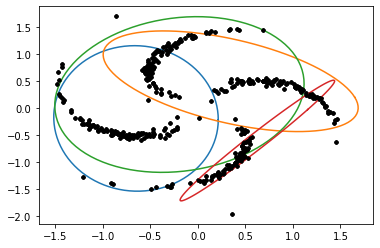

Log likelihood -751.8756542833221
Log likelihood -751.8756542833219
log proportions [0.29092211 0.24606395 0.23783278 0.22518116]
mean_params [[-0.65051883 -0.19014568]
 [ 0.34742434  0.50265925]
 [-0.1929682   0.25451955]
 [ 0.63140327 -0.60707676]]
{'log proportions': array([ 0.14156177, -0.02590233, -0.059926  , -0.11458858]), 'means': array([[-0.65051883, -0.19014568],
       [ 0.34742434,  0.50265925],
       [-0.1929682 ,  0.25451955],
       [ 0.63140327, -0.60707676]]), 'lower triangles': array([[[ 0.43059218, -0.01236665],
        [ 0.00111937,  0.67468273]],

       [[ 0.65051146, -0.15011855],
        [-0.15736915,  0.4399361 ]],

       [[ 0.6530633 ,  0.04813979],
        [ 0.04874629,  0.72147571]],

       [[ 0.25484221,  0.29341822],
        [ 0.30401421,  0.48242044]]])}
[0.0, 5.451495560888669, 0.5249340045932018, 401.3260459501689, 0.0, 0.7406623186419719, 264.82144549513697, 0.0, 364.29210264239646, -2.6645352591003757e-15]
1037.1566859718262
kl-div None
[0.0, 3.788

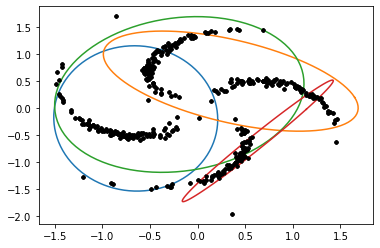

Log likelihood -742.9437976259416
Log likelihood -742.9437976259414
log proportions [0.29024367 0.24757915 0.2371351  0.22504208]
mean_params [[-0.66094348 -0.19026369]
 [ 0.36472577  0.5242261 ]
 [-0.19317289  0.25843491]
 [ 0.60930655 -0.61767679]]
{'log proportions': array([ 0.13916488, -0.01982559, -0.06292592, -0.11526851]), 'means': array([[-0.66094348, -0.19026369],
       [ 0.36472577,  0.5242261 ],
       [-0.19317289,  0.25843491],
       [ 0.60930655, -0.61767679]]), 'lower triangles': array([[[ 0.415261  , -0.00983625],
        [ 0.0048274 ,  0.66712812]],

       [[ 0.63771399, -0.16997357],
        [-0.17521554,  0.40737301]],

       [[ 0.65032272,  0.04800845],
        [ 0.04828241,  0.72302459]],

       [[ 0.24247076,  0.29224919],
        [ 0.28696032,  0.48182683]]])}
[0.0, 7.506548109928724, 0.5579268648610824, 403.25474276156905, 0.0, 0.8752937522544284, 255.3800148742148, 0.0, 359.09535209401525, 4.440892098500626e-16]
1026.6698784568432
kl-div None
[0.0, 4.30262

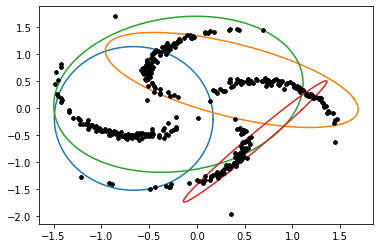

Log likelihood -726.34414155015
Log likelihood -726.3441415501497
log proportions [0.28915471 0.25022094 0.2359835  0.22464085]
mean_params [[-0.67850492 -0.19070983]
 [ 0.39781762  0.56327996]
 [-0.19351802  0.26432398]
 [ 0.59995847 -0.65708462]]
{'log proportions': array([ 0.13535535, -0.00926223, -0.06784463, -0.11710363]), 'means': array([[-0.67850492, -0.19070983],
       [ 0.39781762,  0.56327996],
       [-0.19351802,  0.26432398],
       [ 0.59995847, -0.65708462]]), 'lower triangles': array([[[ 0.39214829, -0.00629979],
        [ 0.00991873,  0.65356167]],

       [[ 0.61751103, -0.20584457],
        [-0.21002409,  0.34192619]],

       [[ 0.64471512,  0.04653966],
        [ 0.04579517,  0.72895534]],

       [[ 0.2452102 ,  0.27546554],
        [ 0.28967485,  0.45465762]]])}
[0.0, 15.550227655123042, 0.6159995775232354, 412.2300699875861, 0.0, 1.2131421890771605, 269.5558366618006, 0.0, 375.26901304833973, -4.440892098500626e-15]
1074.4342891194497
kl-div None
[0.0, 5.385634

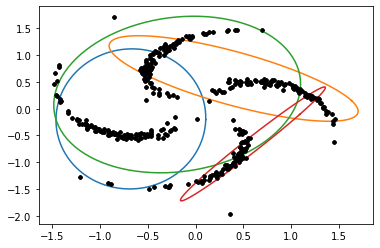

Log likelihood -709.8437410071581
Log likelihood -709.8437410071581
log proportions [0.28850857 0.25175571 0.23547436 0.22426135]
mean_params [[-0.69107429 -0.18922135]
 [ 0.42514056  0.58976802]
 [-0.19375398  0.26918555]
 [ 0.55661761 -0.66306903]]
{'log proportions': array([ 0.13311147, -0.00315411, -0.07001128, -0.11880122]), 'means': array([[-0.69107429, -0.18922135],
       [ 0.42514056,  0.58976802],
       [-0.19375398,  0.26918555],
       [ 0.55661761, -0.66306903]]), 'lower triangles': array([[[ 0.37694937, -0.00227741],
        [ 0.01605046,  0.64188017]],

       [[ 0.59848648, -0.23838981],
        [-0.24260956,  0.27882468]],

       [[ 0.63763656,  0.04310997],
        [ 0.0407701 ,  0.73787793]],

       [[ 0.21431656,  0.27988216],
        [ 0.24915851,  0.46321621]]])}
[0.0, 39.47809070862979, 0.6613804497336879, 438.3937135374549, 0.0, 1.67666474260687, 251.44537685677744, 0.0, 375.8906209876797, -2.55351295663786e-15]
1107.5458472828825
kl-div None
[0.0, 6.44213197

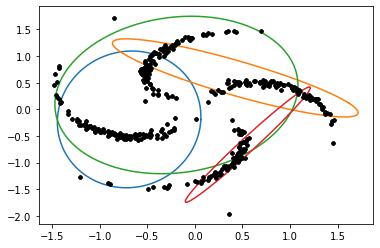

Log likelihood -699.8100390566169
Log likelihood -699.810039056617
log proportions [0.28848849 0.25222936 0.23564819 0.22363396]
mean_params [[-0.69628281 -0.18555923]
 [ 0.4490325   0.60053318]
 [-0.19484878  0.27457562]
 [ 0.54665228 -0.68434787]]
{'log proportions': array([ 0.13310526, -0.00121112, -0.06920997, -0.12153931]), 'means': array([[-0.69628281, -0.18555923],
       [ 0.4490325 ,  0.60053318],
       [-0.19484878,  0.27457562],
       [ 0.54665228, -0.68434787]]), 'lower triangles': array([[[ 0.36753422,  0.00142518],
        [ 0.02192421,  0.63687832]],

       [[ 0.58146948, -0.26478216],
        [-0.26252417,  0.24239814]],

       [[ 0.63071682,  0.03940162],
        [ 0.03546862,  0.74626557]],

       [[ 0.20994435,  0.26965365],
        [ 0.24284948,  0.44702822]]])}
[0.0, 95.91660061860239, 0.6885663516235734, 447.69720076175787, 2.220446049250313e-16, 2.1389704036368737, 253.01714594863085, 0.0, 386.97795119746286, -2.9976021664879227e-15]
1186.4364352817145
kl-di

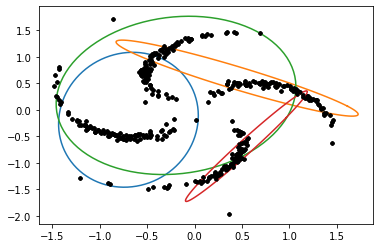

Log likelihood -684.1798100708501
Log likelihood -684.1798100708497
log proportions [0.2896004  0.25177574 0.23738481 0.22123905]
mean_params [[-0.70738699 -0.16322344]
 [ 0.52760213  0.60639918]
 [-0.19555921  0.28474637]
 [ 0.50698339 -0.75359343]]
{'log proportions': array([ 0.13729648, -0.00266677, -0.06152307, -0.13196178]), 'means': array([[-0.70738699, -0.16322344],
       [ 0.52760213,  0.60639918],
       [-0.19555921,  0.28474637],
       [ 0.50698339, -0.75359343]]), 'lower triangles': array([[[ 0.34136238,  0.01568779],
        [ 0.04514085,  0.62628419]],

       [[ 0.54836922, -0.29026943],
        [-0.25842845,  0.23624436]],

       [[ 0.61155739,  0.02818091],
        [ 0.0203393 ,  0.75820728]],

       [[ 0.18860584,  0.23168535],
        [ 0.21173903,  0.39135565]]])}
[0.0, 170.05891969692402, 0.7647095234085501, 455.45799127486254, -2.220446049250313e-16, 2.544848223336097, 230.51887433083888, 0.0, 394.9594167416111, -8.881784197001252e-16]
1254.3047597909813
kl-di

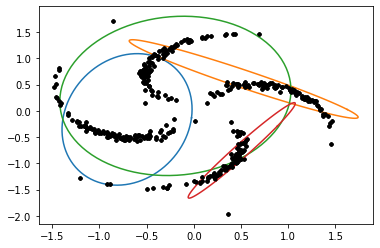

Log likelihood -679.872070660187
Log likelihood -679.8720706601869
log proportions [0.28965886 0.25169564 0.23755177 0.22109373]
mean_params [[-0.70772753 -0.16190444]
 [ 0.52775406  0.60044285]
 [-0.19522371  0.28544179]
 [ 0.50752583 -0.75960895]]
{'log proportions': array([ 0.1375159 , -0.00296738, -0.0608024 , -0.13260127]), 'means': array([[-0.70772753, -0.16190444],
       [ 0.52775406,  0.60044285],
       [-0.19522371,  0.28544179],
       [ 0.50752583, -0.75960895]]), 'lower triangles': array([[[ 0.34052301,  0.01659411],
        [ 0.04670505,  0.62601463]],

       [[ 0.54965035, -0.28608889],
        [-0.25000895,  0.2498884 ]],

       [[ 0.61120789,  0.02735494],
        [ 0.01926337,  0.75908112]],

       [[ 0.18661688,  0.22929909],
        [ 0.20640009,  0.38985336]]])}
[0.0, 115.69110771995337, 0.7687735172949046, 425.9409805385775, -1.1102230246251565e-15, 2.3543145854765335, 211.85925391969187, -1.1102230246251565e-16, 367.394336215306, -8.881784197001252e-16]
1124.

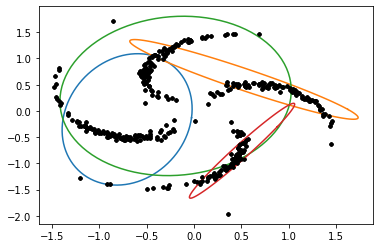

Log likelihood -672.3748634224969
Log likelihood -672.3748634224968
log proportions [0.29011131 0.25148566 0.23856752 0.21983551]
mean_params [[-0.71106022 -0.15084148]
 [ 0.54894741  0.58228823]
 [-0.1954433   0.29070221]
 [ 0.48392095 -0.79518027]]
{'log proportions': array([ 0.13925522, -0.00362346, -0.05635707, -0.13812984]), 'means': array([[-0.71106022, -0.15084148],
       [ 0.54894741,  0.58228823],
       [-0.1954433 ,  0.29070221],
       [ 0.48392095, -0.79518027]]), 'lower triangles': array([[[ 0.33293801,  0.02386522],
        [ 0.0591935 ,  0.62270191]],

       [[ 0.5385072 , -0.2906536 ],
        [-0.24179214,  0.25992495]],

       [[ 0.60414985,  0.02206337],
        [ 0.01209974,  0.76732463]],

       [[ 0.16855499,  0.21026767],
        [ 0.18084413,  0.36200265]]])}
[0.0, 101.50558519078288, 0.8002391461990661, 437.35575614760813, 0.0, 2.3350194636092274, 199.60462510473684, 0.0, 371.7668139568809, 4.440892098500626e-16]
1113.368039009817
kl-div None
[0.0, 9.13506

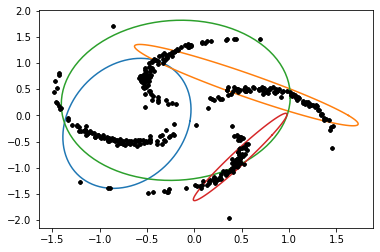

Log likelihood -657.955722150665
Log likelihood -657.955722150665
log proportions [0.29089767 0.25128637 0.24010342 0.21771254]
mean_params [[-0.71407708 -0.13143959]
 [ 0.58444377  0.5577614 ]
 [-0.19768467  0.29633168]
 [ 0.44520088 -0.85715672]]
{'log proportions': array([ 0.14230525, -0.0040731 , -0.04959656, -0.14749072]), 'means': array([[-0.71407708, -0.13143959],
       [ 0.58444377,  0.5577614 ],
       [-0.19768467,  0.29633168],
       [ 0.44520088, -0.85715672]]), 'lower triangles': array([[[ 0.32269881,  0.03438176],
        [ 0.07732517,  0.61878073]],

       [[ 0.52606689, -0.28862425],
        [-0.24406131,  0.24381399]],

       [[ 0.59386768,  0.01639812],
        [ 0.00421516,  0.78051387]],

       [[ 0.14182802,  0.16874829],
        [ 0.14092401,  0.29907456]]])}
[0.0, 139.6322165986757, 0.8385501004011797, 444.7421008065942, -4.440892098500626e-16, 2.600140445236631, 184.4020967441768, 0.0, 376.0747756016712, 2.220446049250313e-16]
1148.2898802967557
kl-div None

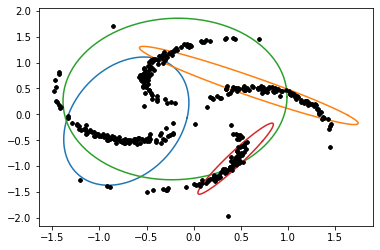

Log likelihood -655.5462314026078
Log likelihood -655.5462314026076
log proportions [0.29092869 0.25126372 0.24017698 0.21763061]
mean_params [[-0.71406278 -0.13066897]
 [ 0.58860343  0.56137499]
 [-0.19772903  0.2963878 ]
 [ 0.44182508 -0.85828335]]
{'log proportions': array([ 0.14242528, -0.00414984, -0.04927685, -0.14785373]), 'means': array([[-0.71406278, -0.13066897],
       [ 0.58860343,  0.56137499],
       [-0.19772903,  0.2963878 ],
       [ 0.44182508, -0.85828335]]), 'lower triangles': array([[[ 0.32241356,  0.03474447],
        [ 0.07795498,  0.6187557 ]],

       [[ 0.53003315, -0.28188249],
        [-0.24060603,  0.24777064]],

       [[ 0.59367852,  0.01622293],
        [ 0.00396799,  0.78107782]],

       [[ 0.14538721,  0.16459138],
        [ 0.1387842 ,  0.296478  ]]])}
[0.0, 115.48406415426267, 0.8394768680664553, 368.10146154744245, 4.440892098500626e-16, 2.5198836971583596, 154.52688480282845, 0.0, 313.1952100176363, -6.661338147750939e-16]
954.6669810873948
kl-div

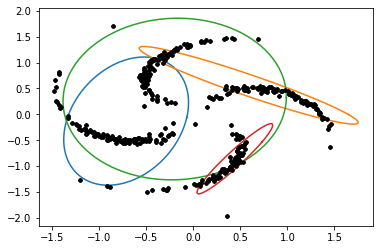

Log likelihood -636.7827092918088
Log likelihood -636.7827092918087
log proportions [0.29206961 0.25069593 0.24250311 0.21473135]
mean_params [[-0.7133534  -0.09986658]
 [ 0.63667218  0.52867178]
 [-0.20318193  0.29850919]
 [ 0.39036653 -0.95196208]]
{'log proportions': array([ 0.14686958, -0.00588181, -0.03910806, -0.16073486]), 'means': array([[-0.7133534 , -0.09986658],
       [ 0.63667218,  0.52867178],
       [-0.20318193,  0.29850919],
       [ 0.39036653, -0.95196208]]), 'lower triangles': array([[[ 0.30946068,  0.04932284],
        [ 0.10299383,  0.61699168]],

       [[ 0.51257669, -0.26876415],
        [-0.23040051,  0.24061434]],

       [[ 0.58835633,  0.01185293],
        [-0.00235811,  0.80097827]],

       [[ 0.1034887 ,  0.09436883],
        [ 0.07969887,  0.18705891]]])}
[0.0, 111.26607050870754, 0.8759067084503918, 422.97910387270196, -4.440892098500626e-16, 2.655721049738651, 167.51771376171956, -1.1102230246251565e-16, 368.7882379564641, 0.0]
1074.0827538577823
kl-d

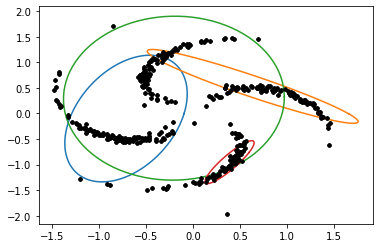

Log likelihood -627.9484599041543
Log likelihood -627.9484599041543
log proportions [0.29442423 0.24801444 0.24857379 0.20898754]
mean_params [[-0.69658912 -0.027834  ]
 [ 0.72073391  0.47392639]
 [-0.21731201  0.2781843 ]
 [ 0.37174344 -0.98727489]]
{'log proportions': array([ 0.15617714, -0.01535758, -0.01310479, -0.18656992]), 'means': array([[-0.69658912, -0.027834  ],
       [ 0.72073391,  0.47392639],
       [-0.21731201,  0.2781843 ],
       [ 0.37174344, -0.98727489]]), 'lower triangles': array([[[ 0.26445212,  0.08722333],
        [ 0.16200281,  0.62696481]],

       [[ 0.47317287, -0.23476097],
        [-0.20370413,  0.22721378]],

       [[ 0.60138124,  0.00621581],
        [-0.01081989,  0.83821341]],

       [[ 0.10425968,  0.09274439],
        [ 0.08057065,  0.18181161]]])}
[0.0, 90.81479092732225, 1.0091122549095455, 444.9172455654344, -1.1102230246251565e-16, 2.8205899712796945, 141.07340950811258, 0.0, 397.30646347363296, 0.0]
1077.9416117006915
kl-div None
[0.0, 17.48

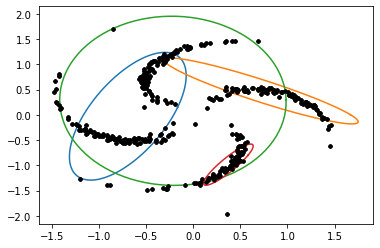

Log likelihood -613.8573028447065
Log likelihood -613.8573028447065
log proportions [0.29788997 0.24153829 0.25659789 0.20397384]
mean_params [[-0.65281339  0.08886855]
 [ 0.80061328  0.3995189 ]
 [-0.2602718   0.21886361]
 [ 0.39254406 -0.95111887]]
{'log proportions': array([ 0.16969686, -0.03999931,  0.02048287, -0.20903557]), 'means': array([[-0.65281339,  0.08886855],
       [ 0.80061328,  0.3995189 ],
       [-0.2602718 ,  0.21886361],
       [ 0.39254406, -0.95111887]]), 'lower triangles': array([[[ 0.20043355,  0.12537903],
        [ 0.1866699 ,  0.70567196]],

       [[ 0.40339287, -0.18141022],
        [-0.16277996,  0.19252461]],

       [[ 0.64589687,  0.0158143 ],
        [ 0.00165107,  0.84797098]],

       [[ 0.1137309 ,  0.10887575],
        [ 0.09312637,  0.20405189]]])}
[0.0, 83.50182524672121, 1.170344965110894, 451.602012671624, 2.220446049250313e-16, 3.0760850570839775, 91.16275886764774, 0.0, 397.6985145365096, 0.0]
1028.2115413446973
kl-div None
[0.0, 38.87024176

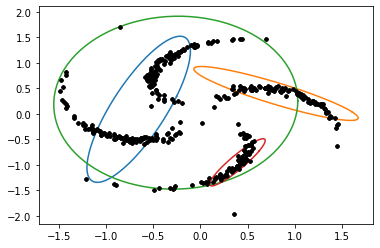

Log likelihood -604.347351934941
Log likelihood -604.347351934941
log proportions [0.30002211 0.23770249 0.25972202 0.20255339]
mean_params [[-0.64770148  0.13886775]
 [ 0.84276909  0.37424974]
 [-0.27451834  0.18373243]
 [ 0.38265987 -0.96773113]]
{'log proportions': array([ 0.17776952, -0.05506677,  0.03352526, -0.21508315]), 'means': array([[-0.64770148,  0.13886775],
       [ 0.84276909,  0.37424974],
       [-0.27451834,  0.18373243],
       [ 0.38265987, -0.96773113]]), 'lower triangles': array([[[ 0.19136996,  0.1307996 ],
        [ 0.19552299,  0.70914355]],

       [[ 0.34510614, -0.14159988],
        [-0.13112015,  0.16835433]],

       [[ 0.65220805,  0.01676089],
        [ 0.00305265,  0.8381627 ]],

       [[ 0.10859014,  0.10109297],
        [ 0.08794261,  0.19527661]]])}
[0.0, 81.97049978506101, 1.2173101643562618, 471.56366812013346, 2.220446049250313e-16, 3.3089446698605647, 70.91378758461062, 0.0, 400.433330241305, 0.0]
1029.407540565327
kl-div None
[0.0, 47.106858084

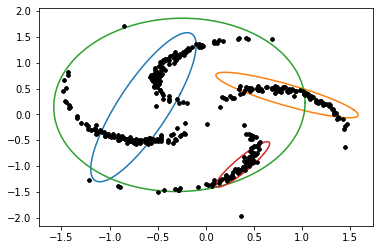

Log likelihood -600.0895846502303
Log likelihood -600.0895846502303
log proportions [0.30001839 0.23692539 0.26079435 0.20226187]
mean_params [[-0.63306422  0.14639473]
 [ 0.86835024  0.39791736]
 [-0.27964093  0.17480156]
 [ 0.38208573 -0.96993545]]
{'log proportions': array([ 0.17790887, -0.05818963,  0.03779726, -0.21637164]), 'means': array([[-0.63306422,  0.14639473],
       [ 0.86835024,  0.39791736],
       [-0.27964093,  0.17480156],
       [ 0.38208573, -0.96993545]]), 'lower triangles': array([[[ 0.21013506,  0.1274234 ],
        [ 0.20352241,  0.70717881]],

       [[ 0.33173442, -0.13784129],
        [-0.13308138,  0.14675483]],

       [[ 0.65367729,  0.01857919],
        [ 0.00546725,  0.83539179]],

       [[ 0.10449385,  0.10015858],
        [ 0.08510424,  0.19318314]]])}
[0.0, 128.22159254879472, 1.100136737812544, 499.00963016626315, 0.0, 3.637249319546547, 70.39459497297382, 0.0, 426.4076098719993, 8.881784197001252e-16]
1128.77081361739
kl-div None
[0.0, 38.01559864

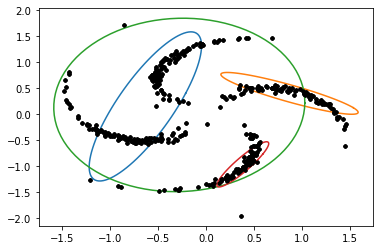

Log likelihood -592.11454418466
Log likelihood -592.1145441846601
log proportions [0.30058041 0.22866543 0.27079368 0.19996048]
mean_params [[-0.60782564  0.22092085]
 [ 0.88459807  0.38917747]
 [-0.28126455  0.08942879]
 [ 0.38192914 -0.97062353]]
{'log proportions': array([ 0.18163847, -0.0918169 ,  0.07728036, -0.22595707]), 'means': array([[-0.60782564,  0.22092085],
       [ 0.88459807,  0.38917747],
       [-0.28126455,  0.08942879],
       [ 0.38192914, -0.97062353]]), 'lower triangles': array([[[ 0.19787817,  0.13086913],
        [ 0.20686726,  0.70246091]],

       [[ 0.30433646, -0.11375027],
        [-0.13379043,  0.13836494]],

       [[ 0.68425154,  0.02001689],
        [ 0.00859553,  0.79809462]],

       [[ 0.10328267,  0.09894039],
        [ 0.08355668,  0.19082663]]])}
[2.220446049250313e-16, 121.01574648505864, 1.192118842645923, 515.6305384571821, -3.3306690738754696e-16, 3.6576084542441105, 63.049946699070006, 0.0, 410.47198550051775, 0.0]
1115.0179444387186
kl-div 

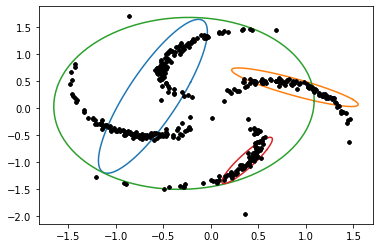

Log likelihood -579.3280383236097
Log likelihood -579.3280383236097
log proportions [0.29285401 0.20969467 0.30443184 0.19301947]
mean_params [[-0.54299119  0.43587005]
 [ 0.88668322  0.38829684]
 [-0.32514325 -0.12978403]
 [ 0.3789986  -0.97620877]]
{'log proportions': array([ 0.16331919, -0.17070252,  0.20209216, -0.25356397]), 'means': array([[-0.54299119,  0.43587005],
       [ 0.88668322,  0.38829684],
       [-0.32514325, -0.12978403],
       [ 0.3789986 , -0.97620877]]), 'lower triangles': array([[[ 0.16420567,  0.13762113],
        [ 0.21799   ,  0.67558481]],

       [[ 0.28049839, -0.0955003 ],
        [-0.12876617,  0.12900434]],

       [[ 0.7179611 ,  0.03166551],
        [ 0.02585113,  0.70399329]],

       [[ 0.10334313,  0.10053556],
        [ 0.08359855,  0.1914845 ]]])}
[-5.551115123125783e-16, 93.21037270867112, 1.7475901374667049, 562.8032182371752, -2.220446049250313e-16, 3.779462476623669, 58.37382609671619, 0.0, 373.58077977001926, 0.0]
1093.4952494266722
kl-div 

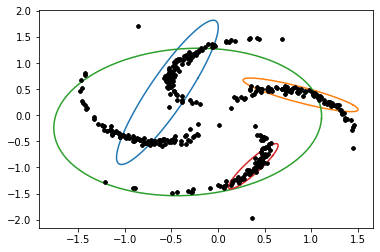

Log likelihood -570.3384922347899
Log likelihood -570.3384922347899
log proportions [0.28156587 0.20538777 0.32238731 0.19065904]
mean_params [[-0.58503586  0.56235737]
 [ 0.92830297  0.36908524]
 [-0.35037739 -0.17294266]
 [ 0.38701451 -0.96537941]]
{'log proportions': array([ 0.12777599, -0.18769066,  0.26316323, -0.26210371]), 'means': array([[-0.58503586,  0.56235737],
       [ 0.92830297,  0.36908524],
       [-0.35037739, -0.17294266],
       [ 0.38701451, -0.96537941]]), 'lower triangles': array([[[ 0.1829793 ,  0.1338542 ],
        [ 0.30499719,  0.60508432]],

       [[ 0.24773937, -0.0794889 ],
        [-0.10822763,  0.11527554]],

       [[ 0.69981403,  0.02003846],
        [ 0.01454424,  0.68622665]],

       [[ 0.09808936,  0.09822448],
        [ 0.07829228,  0.18809975]]])}
[6.661338147750939e-16, 89.17217660702897, 2.092108481895967, 658.8121630409956, -1.1102230246251565e-16, 4.192103677294532, 46.81758225329722, -1.1102230246251565e-16, 388.87346648821205, 4.4408920985

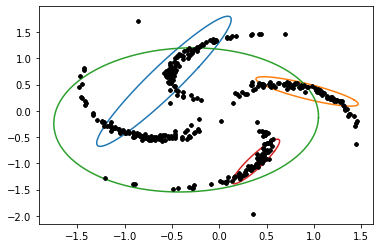

Log likelihood -566.1239789382353
Log likelihood -566.1239789382353
log proportions [0.2803281  0.20519019 0.32394276 0.19053896]
mean_params [[-0.59080777  0.57411272]
 [ 0.92254425  0.36761616]
 [-0.35106163 -0.17564274]
 [ 0.38555168 -0.96642166]]
{'log proportions': array([ 0.12366653, -0.18835687,  0.26827268, -0.26243749]), 'means': array([[-0.59080777,  0.57411272],
       [ 0.92254425,  0.36761616],
       [-0.35106163, -0.17564274],
       [ 0.38555168, -0.96642166]]), 'lower triangles': array([[[ 0.16935962,  0.14215623],
        [ 0.32008071,  0.5908504 ]],

       [[ 0.25250517, -0.08542757],
        [-0.11066863,  0.1224771 ]],

       [[ 0.69606614,  0.02223081],
        [ 0.01671633,  0.68274538]],

       [[ 0.09774341,  0.0984117 ],
        [ 0.07616736,  0.19033785]]])}
[4.440892098500626e-16, 83.0132236280086, 2.3560525065786653, 622.0765977169057, 0.0, 4.11616483908065, 45.100732017865376, 0.0, 362.90202440793365, 0.0]
1119.5647951163726
kl-div None
[4.4408920985006

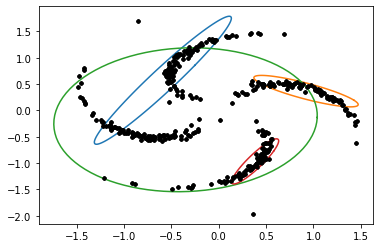

Log likelihood -558.7643788833152
Log likelihood -558.7643788833153
log proportions [0.26446798 0.20557156 0.3403951  0.18956537]
mean_params [[-0.55227725  0.65497721]
 [ 0.94382314  0.34873992]
 [-0.39415748 -0.18670084]
 [ 0.38706377 -0.9640909 ]]
{'log proportions': array([ 0.06841757, -0.18350842,  0.32080439, -0.26456868]), 'means': array([[-0.55227725,  0.65497721],
       [ 0.94382314,  0.34873992],
       [-0.39415748, -0.18670084],
       [ 0.38706377, -0.9640909 ]]), 'lower triangles': array([[[ 0.15996872,  0.13326391],
        [ 0.30177121,  0.53722408]],

       [[ 0.2637466 , -0.10131136],
        [-0.10909368,  0.13798611]],

       [[ 0.6541543 ,  0.02443008],
        [ 0.01892068,  0.67999316]],

       [[ 0.09800294,  0.09999843],
        [ 0.07471574,  0.18816305]]])}
[1.5543122344752192e-15, 59.652422915140114, 2.533268226227799, 636.0452738716162, -2.220446049250313e-16, 4.302664823602497, 45.98808937350377, 0.0, 373.32771862439927, 0.0]
1121.84943783449
kl-div No

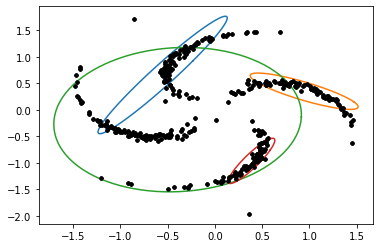

Log likelihood -548.0239542762665
Log likelihood -548.0239542762665
log proportions [0.23012076 0.20344709 0.38011498 0.18631716]
mean_params [[-0.45459349  0.83360147]
 [ 0.91654282  0.36194261]
 [-0.44651824 -0.22327645]
 [ 0.3841495  -0.96828745]]
{'log proportions': array([-0.05659317, -0.1797914 ,  0.44527641, -0.26774698]), 'means': array([[-0.45459349,  0.83360147],
       [ 0.91654282,  0.36194261],
       [-0.44651824, -0.22327645],
       [ 0.3841495 , -0.96828745]]), 'lower triangles': array([[[ 0.14302976,  0.10653777],
        [ 0.25768059,  0.42560511]],

       [[ 0.25652751, -0.09395184],
        [-0.10439089,  0.13672083]],

       [[ 0.61320904,  0.04081572],
        [ 0.03578689,  0.62919809]],

       [[ 0.10202057,  0.10499812],
        [ 0.07469672,  0.18413783]]])}
[0.0, 34.68122096883807, 3.1940164168241036, 659.0326149395484, -1.1102230246251565e-16, 4.553269518351463, 48.83574477566151, 0.0, 376.0053352065668, -2.220446049250313e-16]
1126.3022018257902
kl-div 

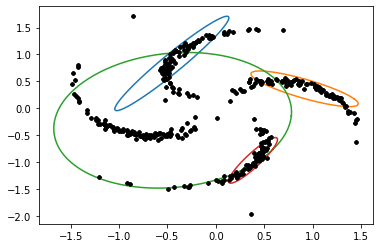

Log likelihood -540.5117760584121
Log likelihood -540.5117760584122
log proportions [0.21537102 0.20347263 0.39550571 0.18565065]
mean_params [[-0.38814087  0.93700298]
 [ 0.91441232  0.33940901]
 [-0.47805555 -0.21882894]
 [ 0.3851692  -0.97574964]]
{'log proportions': array([-0.11533297, -0.17216369,  0.49247004, -0.26382852]), 'means': array([[-0.38814087,  0.93700298],
       [ 0.91441232,  0.33940901],
       [-0.47805555, -0.21882894],
       [ 0.3851692 , -0.97574964]]), 'lower triangles': array([[[ 0.11728773,  0.05486482],
        [ 0.17704573,  0.26867028]],

       [[ 0.30921605, -0.13238054],
        [-0.13404286,  0.1694696 ]],

       [[ 0.66530885,  0.01086668],
        [ 0.0082109 ,  0.62996548]],

       [[ 0.10986812,  0.10571015],
        [ 0.08359921,  0.18217091]]])}
[-2.220446049250313e-16, 15.045480115737035, 3.784017636393103, 703.5188756305726, -2.220446049250313e-16, 4.2133858216755, 67.34799051579019, 0.0, 417.9656772915357, -6.661338147750939e-16]
1211.87542

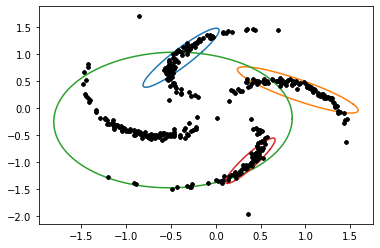

Log likelihood -535.6569360250658
Log likelihood -535.6569360250658
log proportions [0.21484904 0.20357332 0.39592844 0.18564919]
mean_params [[-0.37974316  0.9381609 ]
 [ 0.92467361  0.35687963]
 [-0.479561   -0.21918728]
 [ 0.3815319  -0.97383239]]
{'log proportions': array([-0.11754168, -0.17145109,  0.49375615, -0.26361853]), 'means': array([[-0.37974316,  0.9381609 ],
       [ 0.92467361,  0.35687963],
       [-0.479561  , -0.21918728],
       [ 0.3815319 , -0.97383239]]), 'lower triangles': array([[[ 0.11076515,  0.05444938],
        [ 0.16363973,  0.27386164]],

       [[ 0.30736421, -0.12346943],
        [-0.13424124,  0.1557808 ]],

       [[ 0.65700706,  0.01388555],
        [ 0.0109933 ,  0.62834798]],

       [[ 0.10006425,  0.10801896],
        [ 0.07393665,  0.18768315]]])}
[0.0, 15.845316916176476, 3.79616590461837, 668.4694278415533, 0.0, 4.396340748523721, 59.53610921187678, 0.0, 429.8327088486461, -4.440892098500626e-16]
1181.8760694713947
kl-div None
[0.0, 259.249225

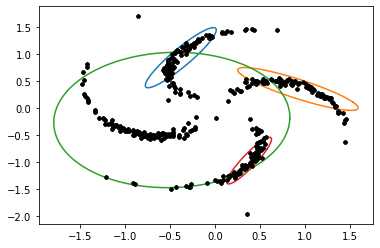

Log likelihood -533.146307395525
Log likelihood -533.146307395525
log proportions [0.2112859  0.20385407 0.3993624  0.18549763]
mean_params [[-0.3656111   0.96521117]
 [ 0.91982882  0.35909089]
 [-0.48136896 -0.22167745]
 [ 0.38197809 -0.96864908]]
{'log proportions': array([-0.1323836 , -0.16819136,  0.50427349, -0.26255368]), 'means': array([[-0.3656111 ,  0.96521117],
       [ 0.91982882,  0.35909089],
       [-0.48136896, -0.22167745],
       [ 0.38197809, -0.96864908]]), 'lower triangles': array([[[ 0.10921401,  0.04541992],
        [ 0.1515494 ,  0.25167105]],

       [[ 0.26934628, -0.09398886],
        [-0.11102543,  0.13492344]],

       [[ 0.62572931,  0.03089191],
        [ 0.02685677,  0.62133467]],

       [[ 0.10160359,  0.10350132],
        [ 0.07359529,  0.18172773]]])}
[0.0, 16.390659230028703, 3.8752650882456656, 648.0522096516185, -2.220446049250313e-16, 4.629403655722126, 50.57538700045406, 0.0, 393.71303160716263, 0.0]
1117.2359562332317
kl-div None
[0.0, 232.02323

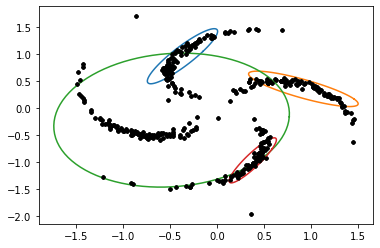

Log likelihood -532.7802262010252
Log likelihood -532.7802262010252
log proportions [0.21089712 0.20386115 0.39975451 0.18548723]
mean_params [[-0.36489358  0.96566027]
 [ 0.91966228  0.36043185]
 [-0.48112194 -0.22152569]
 [ 0.38299429 -0.96924416]]
{'log proportions': array([-0.13400492, -0.16793621,  0.5054753 , -0.26238931]), 'means': array([[-0.36489358,  0.96566027],
       [ 0.91966228,  0.36043185],
       [-0.48112194, -0.22152569],
       [ 0.38299429, -0.96924416]]), 'lower triangles': array([[[ 0.10744932,  0.04713775],
        [ 0.15245775,  0.25311724]],

       [[ 0.26812111, -0.10028211],
        [-0.11211965,  0.13937458]],

       [[ 0.62679439,  0.03067827],
        [ 0.02667655,  0.62161407]],

       [[ 0.10219509,  0.10456719],
        [ 0.07518226,  0.1824619 ]]])}
[-6.661338147750939e-16, 16.71292053862159, 3.9067086666429374, 669.4026327217377, 0.0, 4.61846831046608, 52.50108181867776, 0.0, 405.7214860548438, 2.220446049250313e-16]
1152.86329811099
kl-div None


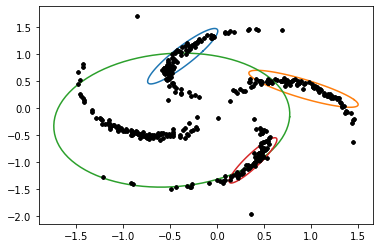

Log likelihood -532.1980813807002
Log likelihood -532.1980813806999
log proportions [0.20154225 0.20448365 0.40850152 0.18547257]
mean_params [[-0.36085768  0.97198153]
 [ 0.92174704  0.35787123]
 [-0.48463658 -0.21563364]
 [ 0.38285021 -0.96963067]]
{'log proportions': array([-0.17418718, -0.15969818,  0.53230942, -0.2572792 ]), 'means': array([[-0.36085768,  0.97198153],
       [ 0.92174704,  0.35787123],
       [-0.48463658, -0.21563364],
       [ 0.38285021, -0.96963067]]), 'lower triangles': array([[[ 0.10756039,  0.04724663],
        [ 0.15325003,  0.25378944]],

       [[ 0.27218983, -0.10323611],
        [-0.11407026,  0.14273145]],

       [[ 0.6197454 ,  0.03125438],
        [ 0.026795  ,  0.62483114]],

       [[ 0.10276361,  0.10502685],
        [ 0.07573312,  0.18347819]]])}
[-1.1102230246251565e-16, 16.200030856830686, 3.8815550678862154, 662.9368742734911, 0.0, 4.644436520256895, 52.63916963535596, 0.0, 403.5345577886492, 2.220446049250313e-16]
1143.83662414247
kl-div No

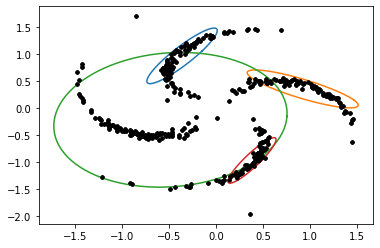

Log likelihood -532.0887238639706
Log likelihood -532.0887238639705
log proportions [0.19977904 0.20468717 0.40998856 0.18554523]
mean_params [[-0.36123411  0.97167808]
 [ 0.92127262  0.35691202]
 [-0.48417698 -0.21445714]
 [ 0.38288944 -0.96935879]]
{'log proportions': array([-0.1820325 , -0.15776164,  0.53688479, -0.2559458 ]), 'means': array([[-0.36123411,  0.97167808],
       [ 0.92127262,  0.35691202],
       [-0.48417698, -0.21445714],
       [ 0.38288944, -0.96935879]]), 'lower triangles': array([[[ 0.10903224,  0.04796715],
        [ 0.15579317,  0.25678256]],

       [[ 0.27917171, -0.10705746],
        [-0.11779502,  0.14590879]],

       [[ 0.62170451,  0.03167354],
        [ 0.02722488,  0.62636608]],

       [[ 0.1040513 ,  0.10656338],
        [ 0.07697317,  0.18588795]]])}
[2.220446049250313e-16, 15.780760303501342, 3.8530410578920513, 652.7938900780993, -1.1102230246251565e-16, 4.595330612788379, 53.11567402000156, 0.0, 397.6303270162508, 0.0]
1127.7690230885332
kl-div 

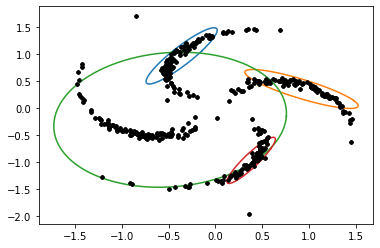

Log likelihood -531.9093970248264
Log likelihood -531.9093970248264
log proportions [0.19384933 0.20567484 0.41447708 0.18599875]
mean_params [[-0.36158195  0.97205403]
 [ 0.92225363  0.35637291]
 [-0.48457046 -0.21103322]
 [ 0.38299958 -0.96937141]]
{'log proportions': array([-0.20916642, -0.14995113,  0.55077006, -0.25050765]), 'means': array([[-0.36158195,  0.97205403],
       [ 0.92225363,  0.35637291],
       [-0.48457046, -0.21103322],
       [ 0.38299958, -0.96937141]]), 'lower triangles': array([[[ 0.10845368,  0.04784119],
        [ 0.15520241,  0.25554228]],

       [[ 0.27852143, -0.10687043],
        [-0.11738815,  0.14597525]],

       [[ 0.61984018,  0.03254885],
        [ 0.02791683,  0.62851553]],

       [[ 0.10383119,  0.10628664],
        [ 0.07671512,  0.18547099]]])}
[2.220446049250313e-16, 15.767038738128026, 3.841582612010672, 654.0990473048872, -2.220446049250313e-16, 4.60530124698516, 53.00776993185758, 0.0, 398.9842322589028, -2.220446049250313e-16]
1130.30497

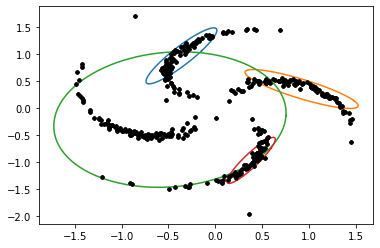

Log likelihood -531.7842394828187
Log likelihood -531.7842394828187
log proportions [0.18378018 0.20786542 0.42101493 0.18733947]
mean_params [[-0.36216767  0.9729075 ]
 [ 0.92352953  0.35602615]
 [-0.48399093 -0.20485496]
 [ 0.38308623 -0.96945827]]
{'log proportions': array([-0.25752886, -0.1343784 ,  0.57139906, -0.23834694]), 'means': array([[-0.36216767,  0.9729075 ],
       [ 0.92352953,  0.35602615],
       [-0.48399093, -0.20485496],
       [ 0.38308623, -0.96945827]]), 'lower triangles': array([[[ 0.10739194,  0.04756243],
        [ 0.15410979,  0.25316332]],

       [[ 0.2768919 , -0.10678451],
        [-0.11657178,  0.14618861]],

       [[ 0.6174    ,  0.03398527],
        [ 0.02907717,  0.632061  ]],

       [[ 0.10360285,  0.10588286],
        [ 0.07640783,  0.18486224]]])}
[0.0, 15.793559187531748, 3.825568937476648, 655.7266762301937, 4.440892098500626e-16, 4.614607005539963, 52.81003812852223, 0.0, 400.31180926418085, 0.0]
1133.082258753445
kl-div None
[0.0, 257.773506

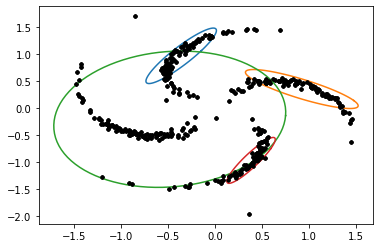

Log likelihood -531.7824946446092
Log likelihood -531.7824946446092
log proportions [0.183777   0.20787114 0.42100416 0.18734771]
mean_params [[-0.36212029  0.97292051]
 [ 0.92353156  0.35598125]
 [-0.48400211 -0.20484562]
 [ 0.38309485 -0.96947407]]
{'log proportions': array([-0.25755333, -0.13435804,  0.57136633, -0.23831011]), 'means': array([[-0.36212029,  0.97292051],
       [ 0.92353156,  0.35598125],
       [-0.48400211, -0.20484562],
       [ 0.38309485, -0.96947407]]), 'lower triangles': array([[[ 0.10714578,  0.04762091],
        [ 0.15375182,  0.25348529]],

       [[ 0.27706169, -0.10665294],
        [-0.11661246,  0.14608839]],

       [[ 0.61738013,  0.03398646],
        [ 0.02907871,  0.63203825]],

       [[ 0.10355993,  0.10587274],
        [ 0.07636826,  0.18485233]]])}
[-6.661338147750939e-16, 15.778612417895548, 3.826649559449108, 655.7738942571871, -2.220446049250313e-16, 4.614483080411462, 52.814298921274656, 0.0, 400.45754605869, 0.0]
1133.265484294908
kl-div Non

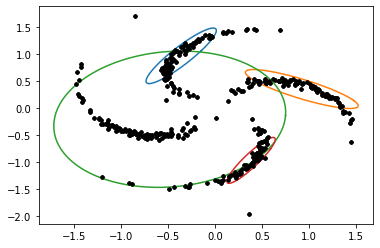

Log likelihood -531.7804373667708
Log likelihood -531.7804373667707
log proportions [0.18345995 0.20842515 0.42000472 0.18811019]
mean_params [[-0.36241649  0.97258394]
 [ 0.92359629  0.35583373]
 [-0.48444421 -0.20419902]
 [ 0.38301091 -0.96954295]]
{'log proportions': array([-0.25993495, -0.13235135,  0.56833461, -0.23490345]), 'means': array([[-0.36241649,  0.97258394],
       [ 0.92359629,  0.35583373],
       [-0.48444421, -0.20419902],
       [ 0.38301091, -0.96954295]]), 'lower triangles': array([[[ 0.10707777,  0.04758834],
        [ 0.1536227 ,  0.25338231]],

       [[ 0.27740656, -0.10684095],
        [-0.11677275,  0.14630865]],

       [[ 0.61688088,  0.0343014 ],
        [ 0.02935732,  0.63240655]],

       [[ 0.10360504,  0.10584068],
        [ 0.07637388,  0.18482208]]])}
[-2.220446049250313e-16, 15.74248721509209, 3.8219957358842738, 655.0851547180824, 0.0, 4.615587061808864, 52.84975975925556, 0.0, 400.1203073400811, -3.3306690738754696e-16]
1132.2352918302042
kl-div 

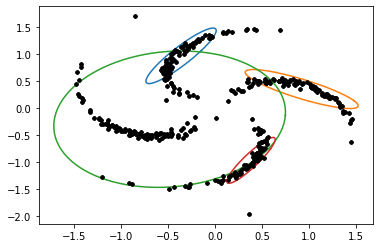

Log likelihood -531.7802141232846
Log likelihood -531.7802141232846
log proportions [0.18320454 0.20853556 0.41996156 0.18829834]
mean_params [[-0.36224877  0.97282455]
 [ 0.92361804  0.35572822]
 [-0.48513876 -0.2045365 ]
 [ 0.38301163 -0.96953092]]
{'log proportions': array([-0.26133645, -0.1318301 ,  0.56822349, -0.23391208]), 'means': array([[-0.36224877,  0.97282455],
       [ 0.92361804,  0.35572822],
       [-0.48513876, -0.2045365 ],
       [ 0.38301163, -0.96953092]]), 'lower triangles': array([[[ 0.10711616,  0.04759166],
        [ 0.15368597,  0.25338274]],

       [[ 0.27760955, -0.10695691],
        [-0.11685895,  0.14646571]],

       [[ 0.61643962,  0.03417958],
        [ 0.02921975,  0.63225565]],

       [[ 0.10360159,  0.1058266 ],
        [ 0.07636274,  0.18480589]]])}
[-2.220446049250313e-16, 15.715178905213595, 3.8234836671615007, 654.9576771533692, 2.220446049250313e-16, 4.620443318216845, 52.882093679272, 0.0, 400.20390979581407, 0.0]
1132.2027865190473
kl-div No

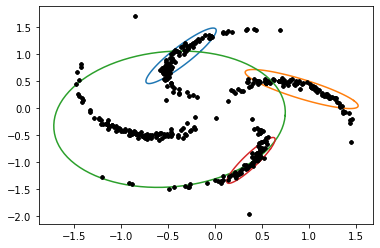

Log likelihood -531.7801944888304
Log likelihood -531.7801944888304
log proportions [0.18317682 0.20856525 0.41993883 0.18831909]
mean_params [[-0.36225118  0.97283685]
 [ 0.92365596  0.35571825]
 [-0.48494364 -0.20428367]
 [ 0.38299938 -0.96954415]]
{'log proportions': array([-0.26149956, -0.13169952,  0.56815759, -0.23381364]), 'means': array([[-0.36225118,  0.97283685],
       [ 0.92365596,  0.35571825],
       [-0.48494364, -0.20428367],
       [ 0.38299938, -0.96954415]]), 'lower triangles': array([[[ 0.10710338,  0.04758787],
        [ 0.15366891,  0.25335974]],

       [[ 0.27759102, -0.10694763],
        [-0.11685288,  0.14644851]],

       [[ 0.61648715,  0.03421372],
        [ 0.02925636,  0.63226749]],

       [[ 0.10362252,  0.10584804],
        [ 0.07638508,  0.18483656]]])}
[0.0, 15.717338455635353, 3.8229620656002297, 654.8852472976116, 0.0, 4.619294264036541, 52.866691055307925, 0.0, 400.1204302876522, -4.440892098500626e-16]
1132.031963425844
kl-div None
[0.0, 258.7787

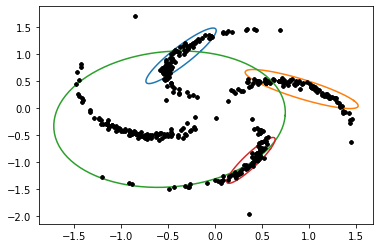

Log likelihood -531.7801919537027
Log likelihood -531.7801919537026
log proportions [0.18314563 0.20857347 0.41994895 0.18833196]
mean_params [[-0.36225429  0.97282849]
 [ 0.92366562  0.35571129]
 [-0.48499612 -0.20432923]
 [ 0.383006   -0.96953319]]
{'log proportions': array([-0.26166023, -0.1316505 ,  0.5681913 , -0.23373572]), 'means': array([[-0.36225429,  0.97282849],
       [ 0.92366562,  0.35571129],
       [-0.48499612, -0.20432923],
       [ 0.383006  , -0.96953319]]), 'lower triangles': array([[[ 0.10710838,  0.04759172],
        [ 0.15367951,  0.2533725 ]],

       [[ 0.27759522, -0.10695611],
        [-0.11685504,  0.14645912]],

       [[ 0.61646542,  0.03420853],
        [ 0.02925046,  0.63225933]],

       [[ 0.10362176,  0.10584881],
        [ 0.07638456,  0.18483787]]])}
[0.0, 15.717562926739468, 3.823012810033717, 654.882836751921, 0.0, 4.619656445285422, 52.8662640038803, 0.0, 400.131439340627, -3.3306690738754696e-16]
1132.0407722784869
kl-div None
[0.0, 258.7714427

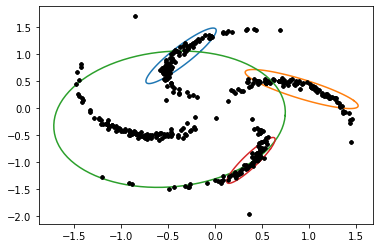

Log likelihood -531.780191329573
Log likelihood -531.7801913295729
log proportions [0.18313666 0.2085797  0.41994613 0.18833751]
mean_params [[-0.36225505  0.97283108]
 [ 0.92366631  0.35571165]
 [-0.48497407 -0.20427856]
 [ 0.38300159 -0.96953973]]
{'log proportions': array([-0.2617101 , -0.13162155,  0.56818366, -0.23370715]), 'means': array([[-0.36225505,  0.97283108],
       [ 0.92366631,  0.35571165],
       [-0.48497407, -0.20427856],
       [ 0.38300159, -0.96953973]]), 'lower triangles': array([[[ 0.10710551,  0.04759258],
        [ 0.15367738,  0.25337263]],

       [[ 0.27759346, -0.10695624],
        [-0.11685435,  0.14645915]],

       [[ 0.61646363,  0.03421795],
        [ 0.02925918,  0.63227481]],

       [[ 0.1036228 ,  0.10584859],
        [ 0.07638507,  0.18483774]]])}
[-2.220446049250313e-16, 15.71772997921228, 3.8228337811346327, 654.8737336508237, -2.220446049250313e-16, 4.6195112827311045, 52.865793437758036, 0.0, 400.12485350082284, 0.0]
1132.0244556324826
kl-div

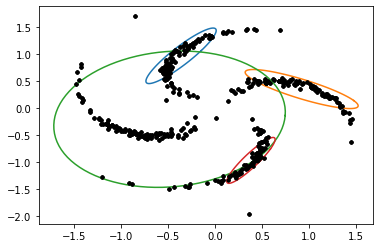

In [3]:
# %load gmm.py
"""Implements a Gaussian mixture model, in which parameters are fit using
   gradient descent.  This example runs on 2-dimensional data, but the model
   works on arbitrarily-high dimension."""

from __future__ import absolute_import
from __future__ import print_function

from __future__ import absolute_import
from __future__ import print_function
from builtins import range

from autograd.misc.optimizers import adam
from autograd.test_util import check_grads


import matplotlib.pyplot as plt

import autograd.numpy as np
import autograd.numpy.random as npr
from autograd import grad, hessian_vector_product
from scipy.optimize import minimize
from autograd.scipy.special import logsumexp
import autograd.scipy.stats.multivariate_normal as mvn
from autograd.misc.flatten import flatten_func
from data import make_pinwheel
from scipy import linalg
#from scipy.special import logsumexp


# npr.seed(1)
# global data    
# data = make_pinwheel(radial_std=0.3, tangential_std=0.05, num_classes=4,
#                          num_per_class=100, rate=0.4)

import warnings
warnings.resetwarnings()
#warnings.filterwarnings('error')
warnings.filterwarnings('error', category=RuntimeWarning)
#warnings.filterwarnings('error', message='*equal comparison failed*')


def mvn_logpdf(X, mu, cov_sqrt):
    #print("mvn_logpdf det term is")
    #print(np.linalg.det(2 * np.pi * cov_sqrt.T @ cov_sqrt))
    return - 0.5 * np.log(np.linalg.det(2 * np.pi * cov_sqrt.T @ cov_sqrt)) \
           - 0.5 * np.sum(((X - mu) @ np.linalg.inv(cov_sqrt))**2, axis=1)

def init_gmm_params(num_components, D, scale, rs=npr.RandomState(1)):
    #rs = npr.seed(1)
    return {'log proportions': rs.randn(num_components) * scale,
            'means':           rs.randn(num_components, D) * scale,
            'lower triangles': np.zeros((num_components, D, D)) + np.eye(D)}

def log_normalize(x):
    return x - logsumexp(x)

def unpack_gmm_params(params):
    normalized_log_proportions = log_normalize(params['log proportions'])
    return normalized_log_proportions, params['means'], params['lower triangles']

def gmm_log_likelihood(params, data):
    cluster_lls = []
    for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params)):
        
        cluster_lls.append(log_proportion + mvn_logpdf(data, mean, cov_sqrt))  

    return np.sum(logsumexp(np.vstack(cluster_lls), axis=0))

def alt_gmm_log_likelihood(params, data):
    cluster_lls = []
    for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params)):
        cov = cov_sqrt.T @ cov_sqrt
        cluster_lls.append(log_proportion + mvn.logpdf(data, mean, cov))
    return np.sum(logsumexp(np.vstack(cluster_lls), axis=0))

def plot_ellipse( ax, mean, cov_sqrt, alpha, num_points=100):
    angles = np.linspace(0, 2*np.pi, num_points)
    circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
    cur_pts = mean + np.dot(circle_pts, cov_sqrt)
    ax.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha)
    plt.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha)
    #plt.show()
    #ax.plot(range(120),range(120))

def plot_gaussian_mixture(params,ax):
    for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params)):
        alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
        plot_ellipse(ax,mean, cov_sqrt, alpha)
        #plot_ellipse(ax, mean, cov_sqrt, alpha)

    

if __name__ == '__main__':
    npr.seed(1)
    init_params = init_gmm_params(num_components=4, D=2, scale=0.1)
  

    def objective(params):
        kl_cov = []
        for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params)):
            kl_cov.append(cov_sqrt.T @ cov_sqrt)           
        return -1*gmm_log_likelihood(params, data) - (0*kl_div_tot(params['means'],kl_cov)) - (-0.0*kl_div_inverse_tot(params['means'],kl_cov))
    def alt_objective(params):
        return -alt_gmm_log_likelihood(params, data)
    
    flattened_obj, unflatten, flattened_init_params =\
        flatten_func(objective, init_params)
   

    def callback(flattened_params):
        params = unflatten(flattened_params)
        print("Log likelihood {}".format(-objective(params)))
        print("Log likelihood {}".format(-alt_objective(params)))
        print("log proportions {}".format(np.exp( log_normalize( params['log proportions']) )  ))
        print("mean_params {}".format(params['means']))
        kl_cov = []
        global params_store
        print(params)
        params_store = params
        for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params)):
            kl_cov.append(cov_sqrt.T @ cov_sqrt)
        print("kl-div {}".format(kl_div_tot_print(params['means'],kl_cov)))
        print("kl-inverse-div {}".format(kl_div_inverse_tot_print(params['means'],kl_cov)))
        print("loglikelihood + both the kl-div {}".format(-alt_objective(params) + kl_div_tot(params['means'],kl_cov) + kl_div_inverse_tot(params['means'],kl_cov)))

        fig = plt.figure()
        ax = fig.add_subplot(111)
        for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params)):
            num_points = 100
            alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
            angles = np.linspace(0, 2*np.pi, num_points)
            circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
            cur_pts = mean + np.dot(circle_pts, cov_sqrt)
            ax.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha)
            ax.plot(data[:, 0], data[:, 1], 'k.')
        print("it is working")
  
        plt.show()
        plt.pause(1.0/60.0)

        #input("Press [enter] to continue.")

    minimize(flattened_obj, flattened_init_params,
                 jac=grad(flattened_obj),
                 hessp=hessian_vector_product(flattened_obj),
                 method='Newton-CG',tol=1e-5, callback=callback)


## We check for the ARI and combinatorial KL-Divs at the end of Step-1

In [4]:
indiv_lls = []
for i in range(np.shape(data)[0]):
    junk_ll = []
    for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params_store)):   

#          cov = (cov_sqrt@ cov_sqrt.T)   
         cov = (cov_sqrt.T @ cov_sqrt)
         junk_ll.append(log_proportion + mvn.logpdf(data[i],mean,cov))
        
    indiv_lls.append(junk_ll.index(max(junk_ll)))
print(indiv_lls)
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(indiv_lls, np.concatenate((np.full((100), 0), np.full((100), 1) , np.full((100), 2), np.full((100), 3)),axis = 0))

[2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

0.6203442227150262

# Next is step 2 of SIA where we use the parameters from the output of step 1 (using *params_store* variable) to initialize this step

Log likelihood -909.18164284945
Log likelihood -537.1008832958165
log proportions [0.18313666 0.2085797  0.41994613 0.18833751]
mean_params [[-0.36177159  0.97250685]
 [ 0.92352178  0.35564195]
 [-0.48481723 -0.20429236]
 [ 0.38250582 -0.96913199]]
{'log proportions': array([-0.2617101 , -0.13162155,  0.56818366, -0.23370715]), 'means': array([[-0.36177159,  0.97250685],
       [ 0.92352178,  0.35564195],
       [-0.48481723, -0.20429236],
       [ 0.38250582, -0.96913199]]), 'lower triangles': array([[[ 0.11276195,  0.04346582],
        [ 0.15123659,  0.25516032]],

       [[ 0.27822679, -0.10575845],
        [-0.11582765,  0.14817559]],

       [[ 0.61634988,  0.03426751],
        [ 0.02930831,  0.63220825]],

       [[ 0.11391425,  0.09964078],
        [ 0.06709337,  0.19052045]]])}
[0.0, 15.196831692625047, 3.7103098367509526, 357.682425759952, 0.0, 4.5906177956672, 35.22747615144713, 0.0, 216.79856714960724, 2.220446049250313e-16]
633.2062283860496
kl-div None
[0.0, 206.2262039780

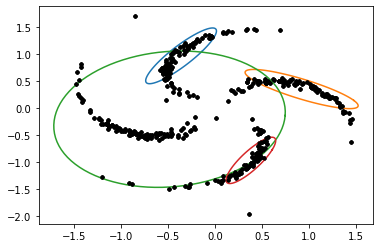

Log likelihood -794.2548161773301
Log likelihood -552.7128127809181
log proportions [0.18313796 0.2085806  0.41994183 0.1883396 ]
mean_params [[-0.36053501  0.97165275]
 [ 0.9230237   0.35536714]
 [-0.48451992 -0.20421228]
 [ 0.38129704 -0.96803967]]
{'log proportions': array([-0.26170609, -0.1316203 ,  0.56817036, -0.23369912]), 'means': array([[-0.36053501,  0.97165275],
       [ 0.9230237 ,  0.35536714],
       [-0.48451992, -0.20421228],
       [ 0.38129704, -0.96803967]]), 'lower triangles': array([[[ 0.12653248,  0.03338803],
        [ 0.14516095,  0.25967551]],

       [[ 0.28033318, -0.10195872],
        [-0.11257511,  0.15371552]],

       [[ 0.6160724 ,  0.03437038],
        [ 0.02941207,  0.63200261]],

       [[ 0.12668871,  0.09188591],
        [ 0.05463122,  0.19854163]]])}
[0.0, 13.871702757274836, 3.479730235116878, 200.80061484068423, 0.0, 4.503086077372569, 25.95615078673947, 0.0, 120.34512575697212, 0.0]
368.9564104541601
kl-div None
[0.0, 129.3269851144601, 45.88640

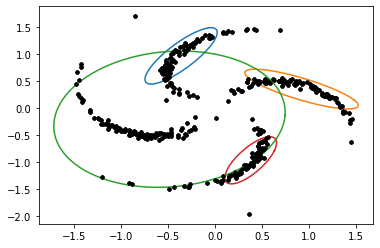

Log likelihood -733.5787629122199
Log likelihood -575.4532099247322
log proportions [0.18314745 0.2085884  0.4199101  0.18835404]
mean_params [[-0.35801403  0.96985421]
 [ 0.92172606  0.35433889]
 [-0.48406173 -0.20389945]
 [ 0.37887848 -0.96546082]]
{'log proportions': array([-0.26167687, -0.13160547,  0.56807222, -0.23364502]), 'means': array([[-0.35801403,  0.96985421],
       [ 0.92172606,  0.35433889],
       [-0.48406173, -0.20389945],
       [ 0.37887848, -0.96546082]]), 'lower triangles': array([[[ 0.1446815 ,  0.01996568],
        [ 0.13665274,  0.26643357]],

       [[ 0.28512575, -0.09375058],
        [-0.1055442 ,  0.16596367]],

       [[ 0.61540767,  0.03452877],
        [ 0.02957121,  0.63149357]],

       [[ 0.13870687,  0.08459881],
        [ 0.04073637,  0.20909923]]])}
[0.0, 12.013456824563606, 3.236282647096324, 125.416132630111, 2.220446049250313e-16, 4.334152286522778, 21.301526054555573, 0.0, 74.88494695410355, -1.1102230246251565e-16]
241.18649739695283
kl-div N

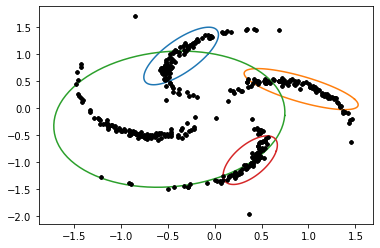

Log likelihood -710.5581556934251
Log likelihood -598.2115001895265
log proportions [0.1831862  0.20862648 0.41977651 0.18841082]
mean_params [[-0.35340292  0.96651971]
 [ 0.91892498  0.35162266]
 [-0.48367384 -0.20329494]
 [ 0.37511197 -0.96025821]]
{'log proportions': array([-0.26155962, -0.13151726,  0.56765971, -0.23343796]), 'means': array([[-0.35340292,  0.96651971],
       [ 0.91892498,  0.35162266],
       [-0.48367384, -0.20329494],
       [ 0.37511197, -0.96025821]]), 'lower triangles': array([[[ 0.16213317,  0.00726743],
        [ 0.12861938,  0.27464049]],

       [[ 0.29168264, -0.08395931],
        [-0.09719   ,  0.18142002]],

       [[ 0.61362601,  0.03470394],
        [ 0.02972444,  0.63044034]],

       [[ 0.14697372,  0.08043148],
        [ 0.02827154,  0.22321687]]])}
[-1.1102230246251565e-16, 10.619077561339077, 3.04024415136281, 88.06040812850549, -2.220446049250313e-16, 4.158019638228426, 18.500694099176, 0.0, 53.664170721114274, 0.0]
178.0426142997261
kl-div Non

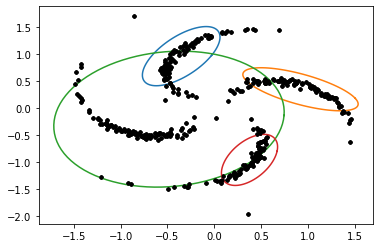

Log likelihood -697.5646868217175
Log likelihood -605.0114557100651
log proportions [0.18378474 0.20926697 0.41768557 0.18926272]
mean_params [[-0.32832904  0.95017044]
 [ 0.90258597  0.33918558]
 [-0.48807877 -0.20104332]
 [ 0.37052146 -0.92841238]]
{'log proportions': array([-0.25975886, -0.12991325,  0.56120488, -0.23038792]), 'means': array([[-0.32832904,  0.95017044],
       [ 0.90258597,  0.33918558],
       [-0.48807877, -0.20104332],
       [ 0.37052146, -0.92841238]]), 'lower triangles': array([[[ 0.18222698,  0.00427808],
        [ 0.13828689,  0.30161432]],

       [[ 0.30837443, -0.08296549],
        [-0.10025996,  0.18792942]],

       [[ 0.59364561,  0.03336896],
        [ 0.02784711,  0.62226963]],

       [[ 0.14562968,  0.1024052 ],
        [ 0.03733581,  0.26716354]]])}
[0.0, 9.446282699524794, 2.8050274941604196, 75.46739499296092, 0.0, 4.16183225253315, 13.964956759863353, 0.0, 53.20853115725603, -1.1102230246251565e-16]
159.05402535629867
kl-div None
[0.0, 39.15277

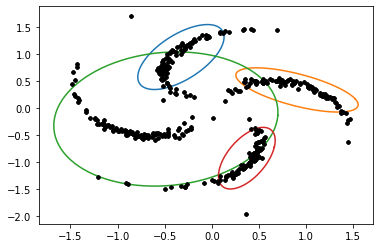

Log likelihood -690.06487623033
Log likelihood -598.6781305480774
log proportions [0.18963281 0.21606123 0.39841461 0.19589135]
mean_params [[-0.29646299  0.97973007]
 [ 0.89228617  0.33774759]
 [-0.56592999 -0.25727904]
 [ 0.37095832 -0.92930017]]
{'log proportions': array([-0.24105038, -0.11057815,  0.5013532 , -0.20857981]), 'means': array([[-0.29646299,  0.97973007],
       [ 0.89228617,  0.33774759],
       [-0.56592999, -0.25727904],
       [ 0.37095832, -0.92930017]]), 'lower triangles': array([[[ 0.19995788,  0.00580503],
        [ 0.16683844,  0.30569596]],

       [[ 0.31635187, -0.08039024],
        [-0.10264164,  0.18883078]],

       [[ 0.5450963 , -0.01377246],
        [-0.01801505,  0.57461756]],

       [[ 0.14767504,  0.110435  ],
        [ 0.03564047,  0.270188  ]]])}
[0.0, 9.139792554507292, 3.421578648364914, 73.24256529761772, 0.0, 5.328879696201172, 13.585853734747202, 0.0, 55.50293768447128, 0.0]
160.2216076159096
kl-div None
[0.0, 34.738174237314226, 15.01664057

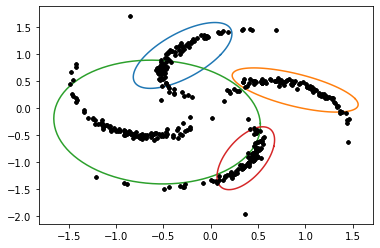

Log likelihood -684.1997155154022
Log likelihood -594.9773520786592
log proportions [0.19716152 0.22457973 0.37649741 0.20176133]
mean_params [[-0.28404115  0.98504281]
 [ 0.87411115  0.33996306]
 [-0.63907774 -0.32825738]
 [ 0.37255282 -0.92525732]]
{'log proportions': array([-0.21475317, -0.08454567,  0.43213471, -0.191691  ]), 'means': array([[-0.28404115,  0.98504281],
       [ 0.87411115,  0.33996306],
       [-0.63907774, -0.32825738],
       [ 0.37255282, -0.92525732]]), 'lower triangles': array([[[ 0.21496234,  0.00480016],
        [ 0.1883589 ,  0.31203377]],

       [[ 0.32628281, -0.0730352 ],
        [-0.10946421,  0.19193354]],

       [[ 0.494615  , -0.06750134],
        [-0.06828998,  0.52913934]],

       [[ 0.14839634,  0.12031513],
        [ 0.02869442,  0.26798281]]])}
[0.0, 8.726098220119482, 4.793578028410545, 70.7631206364892, 0.0, 7.669547001262698, 13.50376972868068, 0.0, 57.27575196456856, -2.220446049250313e-16]
162.7318655795312
kl-div None
[0.0, 30.517171951

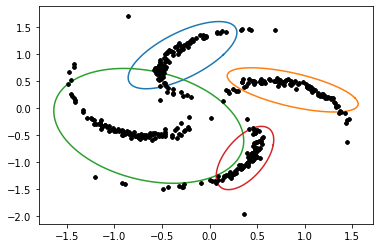

Log likelihood -680.6723377702691
Log likelihood -600.9601835644922
log proportions [0.19924632 0.22664274 0.3707439  0.20336704]
mean_params [[-0.29269006  0.97124476]
 [ 0.8566938   0.34452085]
 [-0.64414115 -0.33020188]
 [ 0.38877324 -0.88995113]]
{'log proportions': array([-0.20728213, -0.07844903,  0.41368755, -0.18681154]), 'means': array([[-0.29269006,  0.97124476],
       [ 0.8566938 ,  0.34452085],
       [-0.64414115, -0.33020188],
       [ 0.38877324, -0.88995113]]), 'lower triangles': array([[[ 0.20214302,  0.00364741],
        [ 0.17477873,  0.3389175 ]],

       [[ 0.34008686, -0.07106163],
        [-0.11211685,  0.19608238]],

       [[ 0.46790272, -0.0644285 ],
        [-0.06185813,  0.52508741]],

       [[ 0.1505219 ,  0.12088123],
        [ 0.0217011 ,  0.27738125]]])}
[0.0, 8.239926044264887, 4.739783148317548, 60.61133077304242, 0.0, 8.104413048859216, 12.407001780744494, 0.0, 50.35344713348212, 0.0]
144.4559019287107
kl-div None
[0.0, 30.57632000508073, 12.2051660

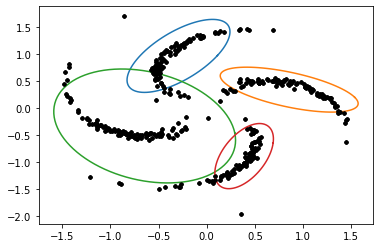

Log likelihood -677.0589475684527
Log likelihood -599.6441597650833
log proportions [0.20570823 0.23309055 0.35290886 0.20829236]
mean_params [[-0.30836383  0.95209923]
 [ 0.83933446  0.33811056]
 [-0.69602184 -0.35067849]
 [ 0.39480213 -0.8730098 ]]
{'log proportions': array([-0.18401456, -0.05904636,  0.35573646, -0.17153068]), 'means': array([[-0.30836383,  0.95209923],
       [ 0.83933446,  0.33811056],
       [-0.69602184, -0.35067849],
       [ 0.39480213, -0.8730098 ]]), 'lower triangles': array([[[ 0.19685177,  0.00441156],
        [ 0.17373253,  0.33637669]],

       [[ 0.35091386, -0.07333103],
        [-0.11053664,  0.22032428]],

       [[ 0.39576309, -0.07621795],
        [-0.06666887,  0.51746438]],

       [[ 0.14772983,  0.12071311],
        [ 0.01940804,  0.27943821]]])}
[0.0, 7.03503138582027, 5.4379400093213555, 59.68530122289138, 0.0, 11.308822374399389, 12.24268865901158, 0.0, 52.3763160600489, 0.0]
148.0860997114929
kl-div None
[0.0, 32.04829359264868, 11.75742085

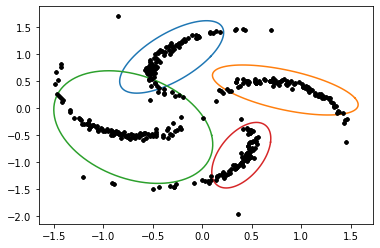

Log likelihood -674.1548408720616
Log likelihood -599.704454550945
log proportions [0.22255598 0.24688764 0.31033313 0.22022325]
mean_params [[-0.31473904  0.92185998]
 [ 0.83547316  0.33939517]
 [-0.75216039 -0.37656212]
 [ 0.38223109 -0.89784943]]
{'log proportions': array([-0.12113516, -0.01738047,  0.21133252, -0.13167203]), 'means': array([[-0.31473904,  0.92185998],
       [ 0.83547316,  0.33939517],
       [-0.75216039, -0.37656212],
       [ 0.38223109, -0.89784943]]), 'lower triangles': array([[[ 2.04657733e-01, -2.43545772e-04],
        [ 1.78552911e-01,  3.52699812e-01]],

       [[ 3.54752717e-01, -6.50524446e-02],
        [-1.06650177e-01,  2.16338808e-01]],

       [[ 3.81957916e-01, -8.47562248e-02],
        [-8.46715889e-02,  4.72810734e-01]],

       [[ 1.55583288e-01,  1.22826299e-01],
        [ 2.33393702e-02,  2.84483369e-01]]])}
[0.0, 7.058922125626173, 7.018629935615534, 57.04836531281048, 0.0, 14.165608062841686, 11.768848548574313, 0.0, 51.51461623262289, 0.0]
1

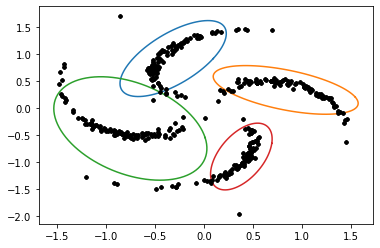

Log likelihood -671.2388436237985
Log likelihood -601.0691289327567
log proportions [0.2378678  0.24819134 0.29034528 0.22359559]
mean_params [[-0.32418014  0.89121443]
 [ 0.83907765  0.33285634]
 [-0.73297847 -0.45109386]
 [ 0.39851057 -0.86005221]]
{'log proportions': array([-0.05970496, -0.01722   ,  0.13965082, -0.121581  ]), 'means': array([[-0.32418014,  0.89121443],
       [ 0.83907765,  0.33285634],
       [-0.73297847, -0.45109386],
       [ 0.39851057, -0.86005221]]), 'lower triangles': array([[[ 0.22551129, -0.01935309],
        [ 0.15730814,  0.36718233]],

       [[ 0.36113241, -0.06213873],
        [-0.10619206,  0.22066457]],

       [[ 0.38940269, -0.11915417],
        [-0.13763331,  0.43679956]],

       [[ 0.1517612 ,  0.11936902],
        [ 0.02287021,  0.27576623]]])}
[0.0, 6.675515663075262, 10.344720940489438, 59.83826315585695, 0.0, 18.841176830644283, 11.981441422579259, -1.1102230246251565e-16, 52.38069497096393, -1.1102230246251565e-16]
160.06181298360912
kl-d

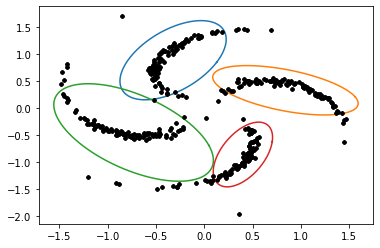

Log likelihood -670.6690336724006
Log likelihood -597.9363262090942
log proportions [0.23857764 0.24817193 0.28995511 0.22329532]
mean_params [[-0.32269466  0.89054473]
 [ 0.83955456  0.33822666]
 [-0.73980649 -0.45763898]
 [ 0.39350894 -0.86979187]]
{'log proportions': array([-0.05677848, -0.01735148,  0.13825287, -0.12297806]), 'means': array([[-0.32269466,  0.89054473],
       [ 0.83955456,  0.33822666],
       [-0.73980649, -0.45763898],
       [ 0.39350894, -0.86979187]]), 'lower triangles': array([[[ 0.2196137 , -0.01965934],
        [ 0.15334373,  0.37473501]],

       [[ 0.35517466, -0.06976794],
        [-0.10983064,  0.2164292 ]],

       [[ 0.38699354, -0.11829418],
        [-0.13553737,  0.43771385]],

       [[ 0.148713  ,  0.11980814],
        [ 0.02154331,  0.27788364]]])}
[0.0, 6.9346143368869395, 10.411269067045822, 59.56034569787846, 0.0, 19.151036813019843, 12.29417236274213, 0.0, 53.827666514697256, 0.0]
162.17910479227044
kl-div None
[0.0, 20.414251851045755, 8.356

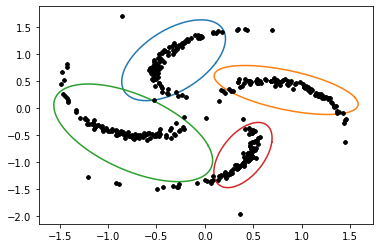

Log likelihood -670.4735404301939
Log likelihood -598.9505323074311
log proportions [0.24021466 0.24811753 0.28894824 0.22271957]
mean_params [[-0.32222866  0.88889766]
 [ 0.83662169  0.33677326]
 [-0.7452029  -0.46182596]
 [ 0.38986424 -0.88167533]]
{'log proportions': array([-0.05007996, -0.01771037,  0.13463466, -0.12569946]), 'means': array([[-0.32222866,  0.88889766],
       [ 0.83662169,  0.33677326],
       [-0.7452029 , -0.46182596],
       [ 0.38986424, -0.88167533]]), 'lower triangles': array([[[ 0.22240624, -0.01954211],
        [ 0.15571679,  0.37720518]],

       [[ 0.35635795, -0.0661545 ],
        [-0.10807111,  0.21611095]],

       [[ 0.38213607, -0.11831573],
        [-0.13488284,  0.434369  ]],

       [[ 0.15176886,  0.11958031],
        [ 0.02149506,  0.27805927]]])}
[-2.220446049250313e-16, 6.922226657727864, 10.744454942953917, 58.20256070074278, 0.0, 19.775699185197798, 12.145268656648291, 0.0, 51.785742594548594, 0.0]
159.57595273781925
kl-div None
[-2.22044604

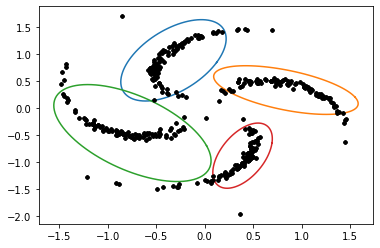

Log likelihood -670.3357442721793
Log likelihood -599.0746441704011
log proportions [0.24922323 0.2477795  0.28269909 0.22029818]
mean_params [[-0.32403311  0.88618763]
 [ 0.83639071  0.33834102]
 [-0.75180975 -0.45377462]
 [ 0.38882202 -0.88453987]]
{'log proportions': array([-0.01392811, -0.01973785,  0.11210593, -0.13729512]), 'means': array([[-0.32403311,  0.88618763],
       [ 0.83639071,  0.33834102],
       [-0.75180975, -0.45377462],
       [ 0.38882202, -0.88453987]]), 'lower triangles': array([[[ 0.22146288, -0.01955107],
        [ 0.15513959,  0.37763921]],

       [[ 0.35587305, -0.06726609],
        [-0.10815996,  0.21777844]],

       [[ 0.3785434 , -0.11399075],
        [-0.13014203,  0.42967191]],

       [[ 0.15289882,  0.12056015],
        [ 0.02202824,  0.27984651]]])}
[0.0, 6.883075724102595, 10.64514520922655, 57.72151302439138, -2.220446049250313e-16, 19.75664449483284, 12.031702204610456, 0.0, 51.67161469777609, 0.0]
158.70969535493992
kl-div None
[0.0, 19.994269

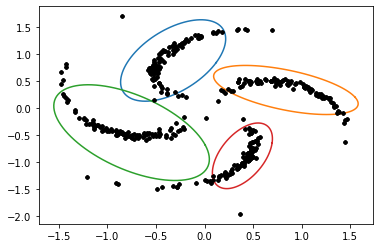

Log likelihood -670.3329688234293
Log likelihood -599.249416542873
log proportions [0.24925463 0.24777529 0.28266789 0.2203022 ]
mean_params [[-0.32390847  0.88631816]
 [ 0.83645273  0.33825362]
 [-0.75164667 -0.45390192]
 [ 0.38843648 -0.88434581]]
{'log proportions': array([-0.01380633, -0.01975908,  0.11199136, -0.13728109]), 'means': array([[-0.32390847,  0.88631816],
       [ 0.83645273,  0.33825362],
       [-0.75164667, -0.45390192],
       [ 0.38843648, -0.88434581]]), 'lower triangles': array([[[ 0.22136562, -0.01964263],
        [ 0.15493114,  0.37781822]],

       [[ 0.35609281, -0.06703433],
        [-0.1081201 ,  0.21759232]],

       [[ 0.37894974, -0.11402368],
        [-0.13024476,  0.42991881]],

       [[ 0.1525274 ,  0.12036057],
        [ 0.02139624,  0.2801169 ]]])}
[0.0, 6.883997325466757, 10.631184596017688, 57.32198190659531, 0.0, 19.715491540352904, 12.041697289111305, 0.0, 51.528563090839604, 0.0]
158.12291574838358
kl-div None
[0.0, 19.99445836775841, 8.00563

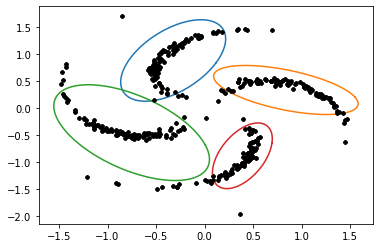

Log likelihood -670.3288410580185
Log likelihood -599.1630644267832
log proportions [0.24955231 0.24772996 0.28242044 0.22029729]
mean_params [[-0.32355927  0.88691249]
 [ 0.83670358  0.33811805]
 [-0.75033605 -0.45529511]
 [ 0.38872388 -0.88375203]]
{'log proportions': array([-0.01264089, -0.01997017,  0.11108744, -0.13733151]), 'means': array([[-0.32355927,  0.88691249],
       [ 0.83670358,  0.33811805],
       [-0.75033605, -0.45529511],
       [ 0.38872388, -0.88375203]]), 'lower triangles': array([[[ 0.22137266, -0.01966497],
        [ 0.15489995,  0.37784066]],

       [[ 0.3560724 , -0.06703185],
        [-0.10810883,  0.21761129]],

       [[ 0.37972235, -0.11491807],
        [-0.13123388,  0.43088915]],

       [[ 0.15241104,  0.12020163],
        [ 0.02146892,  0.27963291]]])}
[0.0, 6.886350447974154, 10.648874074833339, 57.53485391825771, 0.0, 19.719164260997562, 12.066398844655462, 0.0, 51.59426170150154, 0.0]
158.44990324821975
kl-div None
[0.0, 19.997187624025422, 8.0420

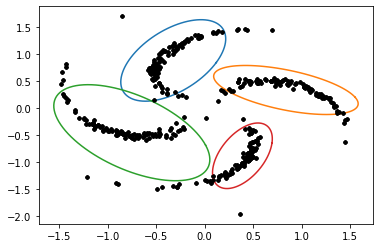

Log likelihood -670.3272114058157
Log likelihood -599.0999298395355
log proportions [0.25008296 0.24764061 0.28206402 0.22021242]
mean_params [[-0.32335403  0.88715768]
 [ 0.83686868  0.33800762]
 [-0.74882956 -0.45701011]
 [ 0.38908341 -0.88323743]]
{'log proportions': array([-0.01054557, -0.02035973,  0.10979579, -0.13774564]), 'means': array([[-0.32335403,  0.88715768],
       [ 0.83686868,  0.33800762],
       [-0.74882956, -0.45701011],
       [ 0.38908341, -0.88323743]]), 'lower triangles': array([[[ 0.22135477, -0.01971691],
        [ 0.15481274,  0.37799816]],

       [[ 0.35606075, -0.06706837],
        [-0.10813424,  0.21757623]],

       [[ 0.38055705, -0.11570987],
        [-0.13216381,  0.4317426 ]],

       [[ 0.15219433,  0.12002436],
        [ 0.02141438,  0.27925112]]])}
[0.0, 6.88972513005872, 10.661051160708494, 57.68003857997327, 0.0, 19.711043214243332, 12.09325207455488, 0.0, 51.63811594195631, 0.0]
158.673226101495
kl-div None
[0.0, 19.99456028607116, 8.071985726

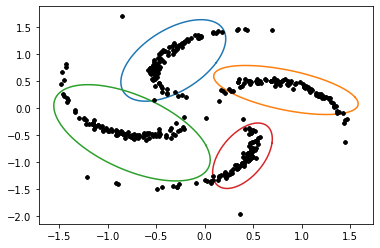

Log likelihood -670.3270289409874
Log likelihood -599.1217480819719
log proportions [0.25033549 0.24758963 0.28198615 0.22008873]
mean_params [[-0.32347686  0.88687525]
 [ 0.83681098  0.33807916]
 [-0.74905953 -0.45673894]
 [ 0.38900013 -0.88339797]]
{'log proportions': array([-0.00952767, -0.02055697,  0.10952833, -0.13829884]), 'means': array([[-0.32347686,  0.88687525],
       [ 0.83681098,  0.33807916],
       [-0.74905953, -0.45673894],
       [ 0.38900013, -0.88339797]]), 'lower triangles': array([[[ 0.2213765 , -0.01969722],
        [ 0.15486461,  0.37803206]],

       [[ 0.35609303, -0.06706662],
        [-0.1081338 ,  0.21762484]],

       [[ 0.38039374, -0.11550727],
        [-0.13196602,  0.43145019]],

       [[ 0.15225119,  0.12008726],
        [ 0.02144954,  0.27936313]]])}
[0.0, 6.88720683416563, 10.65894765432384, 57.65291316888604, 0.0, 19.713202797926673, 12.08700040134258, 0.0, 51.62416014741599, 0.0]
158.62343100406076
kl-div None
[0.0, 19.990701778947443, 8.0617793

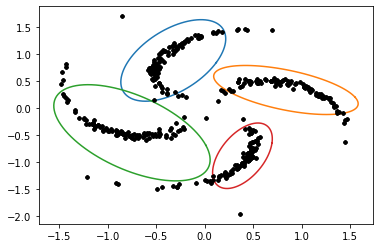

Log likelihood -670.3270024894895
Log likelihood -599.1189170726905
log proportions [0.25038561 0.24758073 0.28196319 0.22007048]
mean_params [[-0.32339416  0.88702004]
 [ 0.83685178  0.33804297]
 [-0.74901496 -0.45677093]
 [ 0.3890549  -0.88333486]]
{'log proportions': array([-0.00932744, -0.02059289,  0.10944694, -0.13838176]), 'means': array([[-0.32339416,  0.88702004],
       [ 0.83685178,  0.33804297],
       [-0.74901496, -0.45677093],
       [ 0.3890549 , -0.88333486]]), 'lower triangles': array([[[ 0.22137657, -0.01970846],
        [ 0.15484424,  0.37801819]],

       [[ 0.35608973, -0.0670623 ],
        [-0.10812973,  0.2176271 ]],

       [[ 0.3804968 , -0.11559493],
        [-0.13207562,  0.43153448]],

       [[ 0.15223683,  0.12007711],
        [ 0.02144135,  0.27934733]]])}
[0.0, 6.887431852779942, 10.662023464115968, 57.65801807716646, 0.0, 19.71228795669261, 12.087437808464989, 0.0, 51.63375862727234, 0.0]
158.64095778649232
kl-div None
[0.0, 19.990565475705626, 8.06541

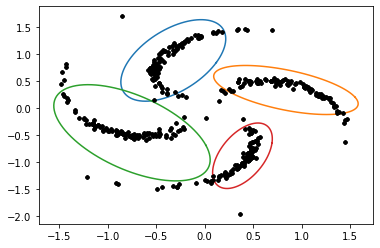

Log likelihood -670.3269940625192
Log likelihood -599.118160905901
log proportions [0.25045949 0.24756681 0.28194183 0.22003187]
mean_params [[-0.32342202  0.88696133]
 [ 0.83683931  0.33804509]
 [-0.74898133 -0.45682661]
 [ 0.38904635 -0.88333746]]
{'log proportions': array([-0.00902931, -0.02064601,  0.10937429, -0.13855412]), 'means': array([[-0.32342202,  0.88696133],
       [ 0.83683931,  0.33804509],
       [-0.74898133, -0.45682661],
       [ 0.38904635, -0.88333746]]), 'lower triangles': array([[[ 0.22137489, -0.01971331],
        [ 0.15483668,  0.37803944]],

       [[ 0.35608805, -0.06706566],
        [-0.10813243,  0.21762097]],

       [[ 0.38049639, -0.11559685],
        [-0.1320819 ,  0.43152051]],

       [[ 0.15223726,  0.12007625],
        [ 0.02144503,  0.27934075]]])}
[0.0, 6.887634918580278, 10.662324455188717, 57.66129382421112, 0.0, 19.71334764062709, 12.08782114504356, -1.1102230246251565e-16, 51.63152190424373, 0.0]
158.6439438878945
kl-div None
[0.0, 19.9894613

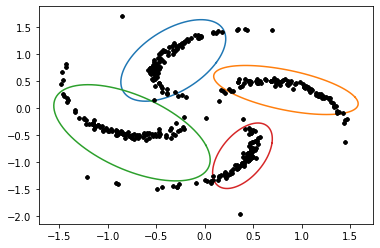

Log likelihood -670.3269938706948
Log likelihood -599.1171151522661
log proportions [0.25045973 0.24756679 0.28194209 0.22003139]
mean_params [[-0.32341733  0.88696423]
 [ 0.83684008  0.33804648]
 [-0.74898145 -0.4568249 ]
 [ 0.38904973 -0.88333707]]
{'log proportions': array([-0.00902824, -0.02064599,  0.10937528, -0.13855618]), 'means': array([[-0.32341733,  0.88696423],
       [ 0.83684008,  0.33804648],
       [-0.74898145, -0.4568249 ],
       [ 0.38904973, -0.88333707]]), 'lower triangles': array([[[ 0.22137253, -0.01970955],
        [ 0.15484111,  0.37803572]],

       [[ 0.35608825, -0.06706446],
        [-0.10813188,  0.2176203 ]],

       [[ 0.38049752, -0.11559653],
        [-0.13208389,  0.43151403]],

       [[ 0.15223814,  0.12007734],
        [ 0.02144653,  0.27934155]]])}
[0.0, 6.887632597458618, 10.662749462511853, 57.66179826029943, 0.0, 19.713609581159165, 12.087707494023116, 0.0, 51.632000483888284, 0.0]
158.64549787934047
kl-div None
[0.0, 19.990303180871837, 8.064

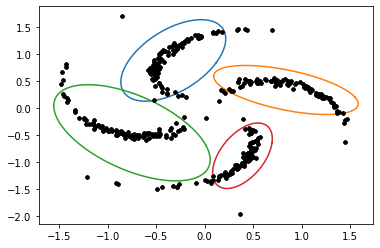

In [5]:


# npr.seed(1)
# global data    
# data = make_pinwheel(radial_std=0.3, tangential_std=0.05, num_classes=4,
#                          num_per_class=100, rate=0.4)

import warnings
warnings.resetwarnings()
#warnings.filterwarnings('error')
warnings.filterwarnings('error', category=RuntimeWarning)
#warnings.filterwarnings('error', message='*equal comparison failed*')


def mvn_logpdf(X, mu, cov_sqrt):
    #print("mvn_logpdf det term is")
    #print(np.linalg.det(2 * np.pi * cov_sqrt.T @ cov_sqrt))
    return - 0.5 * np.log(np.linalg.det(2 * np.pi * cov_sqrt.T @ cov_sqrt)) \
           - 0.5 * np.sum(((X - mu) @ np.linalg.inv(cov_sqrt))**2, axis=1)

def init_gmm_params(num_components, D, scale, rs=npr.RandomState(1)):
    #rs = npr.seed(1)
    return {'log proportions': rs.randn(num_components) * scale,
            'means':           rs.randn(num_components, D) * scale,
            'lower triangles': np.zeros((num_components, D, D)) + np.eye(D)}

def log_normalize(x):
    return x - logsumexp(x)

def unpack_gmm_params(params):
    normalized_log_proportions = log_normalize(params['log proportions'])
    return normalized_log_proportions, params['means'], params['lower triangles']

def gmm_log_likelihood(params, data):
    cluster_lls = []
    for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params)):
        
        cluster_lls.append(log_proportion + mvn_logpdf(data, mean, cov_sqrt))  
       
    return np.sum(logsumexp(np.vstack(cluster_lls), axis=0))

def alt_gmm_log_likelihood(params, data):
    cluster_lls = []
    for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params)):
        cov = cov_sqrt.T @ cov_sqrt
        cluster_lls.append(log_proportion + mvn.logpdf(data, mean, cov))
    return np.sum(logsumexp(np.vstack(cluster_lls), axis=0))

def plot_ellipse( ax, mean, cov_sqrt, alpha, num_points=100):
    angles = np.linspace(0, 2*np.pi, num_points)
    circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
    cur_pts = mean + np.dot(circle_pts, cov_sqrt)
    ax.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha)
    plt.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha)


def plot_gaussian_mixture(params,ax):
    for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params)):
        alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
        plot_ellipse(ax,mean, cov_sqrt, alpha)
 



if __name__ == '__main__':
    npr.seed(1)
    #init_params = init_gmm_params(num_components=4, D=2, scale=0.1)
    ########### NOTE THE INITIALIZATION OF PARAMETERS IS DIFFERENT #######################
    init_params = params_store

    def objective(params):
        kl_cov = []
        for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params)):
            kl_cov.append(cov_sqrt.T @ cov_sqrt)           
        return -1*gmm_log_likelihood(params, data) - (-0.25*kl_div_tot(params['means'],kl_cov)) - (-0.25*kl_div_inverse_tot(params['means'],kl_cov))
    def alt_objective(params):
        return -alt_gmm_log_likelihood(params, data)
    
    flattened_obj, unflatten, flattened_init_params =\
        flatten_func(objective, init_params)
   

    def callback(flattened_params):
        params = unflatten(flattened_params)
        print("Log likelihood {}".format(-objective(params)))
        print("Log likelihood {}".format(-alt_objective(params)))
        print("log proportions {}".format(np.exp( log_normalize( params['log proportions']) )  ))
        print("mean_params {}".format(params['means']))
        kl_cov = []
        global params_store
        print(params)
        params_store = params
        for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params)):
            kl_cov.append(cov_sqrt.T @ cov_sqrt)
        print("kl-div {}".format(kl_div_tot_print(params['means'],kl_cov)))
        print("kl-inverse-div {}".format(kl_div_inverse_tot_print(params['means'],kl_cov)))
        print("loglikelihood + both the kl-div {}".format(-alt_objective(params) + kl_div_tot(params['means'],kl_cov) + kl_div_inverse_tot(params['means'],kl_cov)))
        #ax.cla()
        #plt.clf()
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params)):
            num_points = 100
            alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
            angles = np.linspace(0, 2*np.pi, num_points)
            circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
            cur_pts = mean + np.dot(circle_pts, cov_sqrt)
            ax.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha)
            ax.plot(data[:, 0], data[:, 1], 'k.')
        print("it is working")
 
        plt.show()
        plt.pause(1.0/60.0)

        #input("Press [enter] to continue.")

    minimize(flattened_obj, flattened_init_params,
                 jac=grad(flattened_obj),
                 hessp=hessian_vector_product(flattened_obj),
                 method='Newton-CG',tol=1e-5, callback=callback)


In [6]:
indiv_lls = []
for i in range(np.shape(data)[0]):
    junk_ll = []
    for log_proportion, mean, cov_sqrt in zip(*unpack_gmm_params(params_store)):   

#          cov = (cov_sqrt@ cov_sqrt.T)   
         cov = (cov_sqrt.T@ cov_sqrt)
         junk_ll.append(log_proportion + mvn.logpdf(data[i],mean,cov))
        
    indiv_lls.append(junk_ll.index(max(junk_ll)))
print(indiv_lls)
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(indiv_lls, np.concatenate((np.full((100), 0), np.full((100), 1) , np.full((100), 2), np.full((100), 3)),axis = 0))

[2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

0.9229848892057436